DSML PROJECT

PRITAM ANURAG 19228
ARIHANT MOHAPATRA 19049

INCOME PREDICTION

In [3]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer


In [4]:
df=pd.read_csv('/Users/pritamanurag/Downloads/Python Project/Project training dataset - train (1) (1).csv')
df

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [5]:
df.drop('Unnamed: 0',axis='columns', inplace=True)

In [6]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
#Converting the scientific format to readable format

df.describe().apply(lambda s: s.apply('{:.5f}'.format))

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.00000,43957.00000,43957.00000,43957.00000,43957.00000,43957.00000,43957.00000
mean,38.61715,189673.00437,10.07412,1093.55980,88.24649,40.40769,0.23928
std,13.73440,105821.52256,2.57509,7570.53606,404.58841,12.40030,0.42665
min,17.00000,13492.00000,1.00000,0.00000,0.00000,1.00000,0.00000
25%,28.00000,117496.00000,9.00000,0.00000,0.00000,40.00000,0.00000
50%,37.00000,178100.00000,10.00000,0.00000,0.00000,40.00000,0.00000
75%,48.00000,237671.00000,12.00000,0.00000,0.00000,45.00000,0.00000
max,90.00000,1490400.00000,16.00000,99999.00000,4356.00000,99.00000,1.00000


The age column has a range of 17 to 90.
The fnlwgt column has a minimum value of 13492 and maximum value of 1490400
The education number has a range of 1 to 16
The capital gain starts from 0 and ends at 99999
The capital loss starts at 0 and ends at 4356
Hours per week range between 1 to 99.
There are outliers expected in Capital gain column as the values till 75% are 0.
Same is the case with capital loss as well.
The fnlweight column also has a huge diffence between 75% values and the max value. There is a chance of getting outliers here as well.

0    33439
1    10518
Name: income_>50K, dtype: int64


<AxesSubplot:ylabel='income_>50K'>

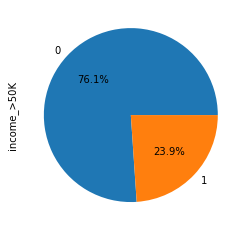

In [11]:
print(df['income_>50K'].value_counts())
df['income_>50K'].value_counts().plot.pie(autopct='%1.1f%%')

People with income less than 50k are more in number 24719 and people with income greater than 50k are significantly less (7841).

Our data is imbalanced in terms of our target variable.

In [12]:
df2=pd.read_csv('/Users/pritamanurag/Downloads/Python Project/train_class_labels.csv')
df2

,Unnamed: 0,income_>50K
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
43952,43952,1
43953,43953,0
43954,43954,0
43955,43955,0


In [13]:
df2.drop('Unnamed: 0',axis='columns', inplace=True)

In [14]:
df2

,income_>50K
0,1
1,0
2,1
3,0
4,0
...,...
43952,1
43953,0
43954,0
43955,0


In [15]:
print(df2['income_>50K'].value_counts())

0    33439
1    10518
Name: income_>50K, dtype: int64


In [16]:
#Exploring the age column
df.age.value_counts()

33    1213
36    1212
31    1195
23    1194
35    1193
      ... 
88       6
85       4
89       2
87       2
86       1
Name: age, Length: 74, dtype: int64

In [17]:
df.age.unique()

array([67, 17, 31, 58, 25, 59, 70, 35, 28, 21, 30, 20, 45, 76, 54, 19, 44,
       47, 37, 27, 24, 49, 36, 71, 62, 64, 53, 34, 42, 26, 43, 23, 56, 40,
       63, 50, 29, 52, 33, 38, 66, 46, 32, 68, 41, 80, 73, 39, 57, 51, 69,
       22, 18, 55, 65, 60, 48, 61, 72, 90, 74, 77, 75, 81, 82, 88, 84, 83,
       79, 78, 85, 89, 87, 86])

In [18]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


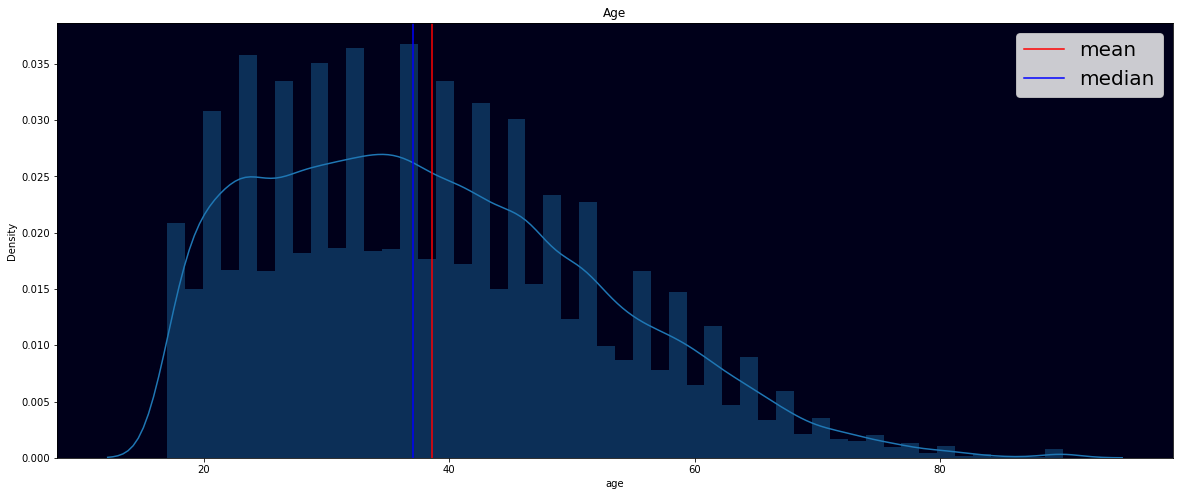

In [19]:
draw_distplot(column=df['age'], title="Age")

There are no null values in Age column.
The data is slightly right skewed.
Majority of the data is spread in a range 17 - 50

In [20]:
mask = df['income_>50K'] ==1
df3=df[mask]
df4=df[~mask]
df3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1
17,54,Federal-gov,278076,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
19,44,Private,136986,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,39,Private,33355,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,48,United-States,1
43943,53,Private,153064,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,10,Yugoslavia,1
43946,47,Private,420986,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
43948,44,Private,247880,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,8614,0,40,United-States,1


In [21]:
df4

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43951,28,Private,64940,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,0
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


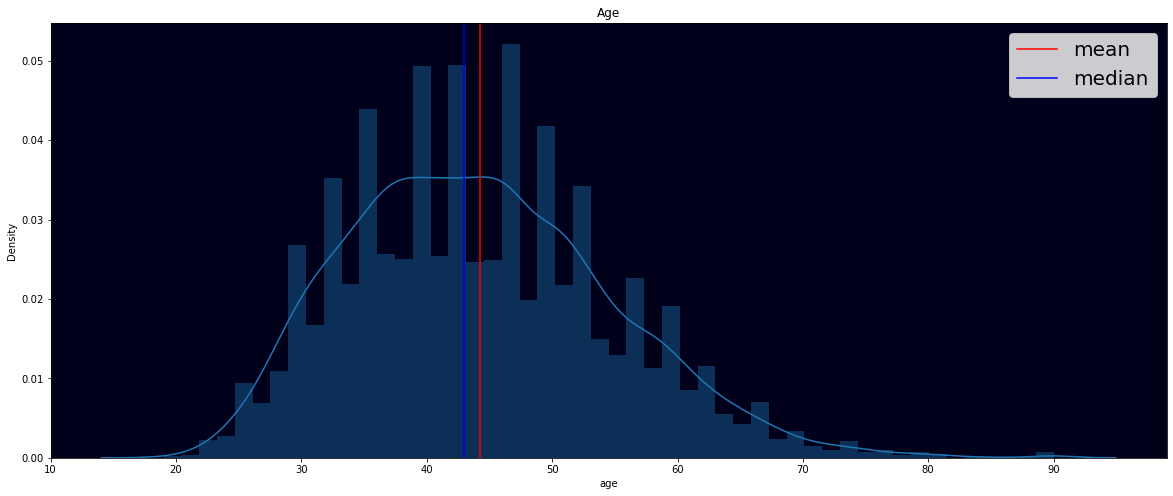

In [22]:
draw_distplot(column=df3['age'], title="Age")

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


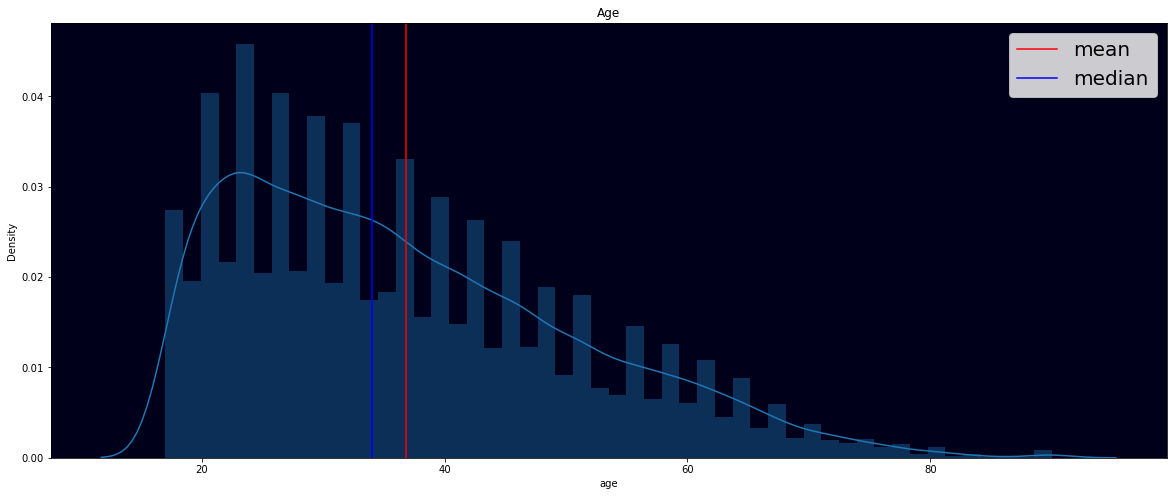

In [23]:
draw_distplot(column=df4['age'], title="Age")

In [24]:
#Exploring Workclass column
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

In [25]:
df.workclass.unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', nan, 'Never-worked', 'Without-pay'],
      dtype=object)

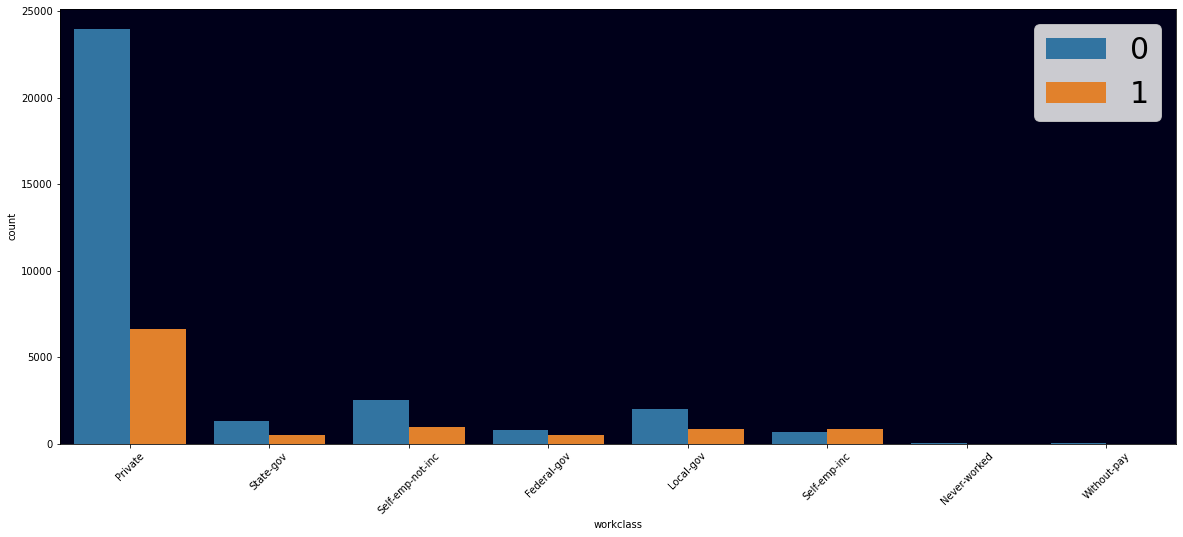

In [26]:
draw_countplot(countplot_x='workclass', countplot_hue='income_>50K', countplot_data=df)

In [27]:
df['workclass'].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

We observe that Never-Worked and Without-pay workclass are very less (also will always have <50K). So we merged the two workclass in another category of workclass and named it as others.

In [28]:
df['workclass'].replace(['Never-worked', 'Without-pay'],'Other', inplace = True)
df['workclass'].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Other                  28
Name: workclass, dtype: int64

In [29]:
pd.isnull(df["workclass"]).value_counts()

False    41459
True      2498
Name: workclass, dtype: int64

In [30]:
df[df.workclass.isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


The maximum data has Workclass as Private.
The data contains null values representes as NAN.
It is observed that wherever Workclass is NaN, occupation is also NaN
There are 2498 missing values which we need to handle.

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


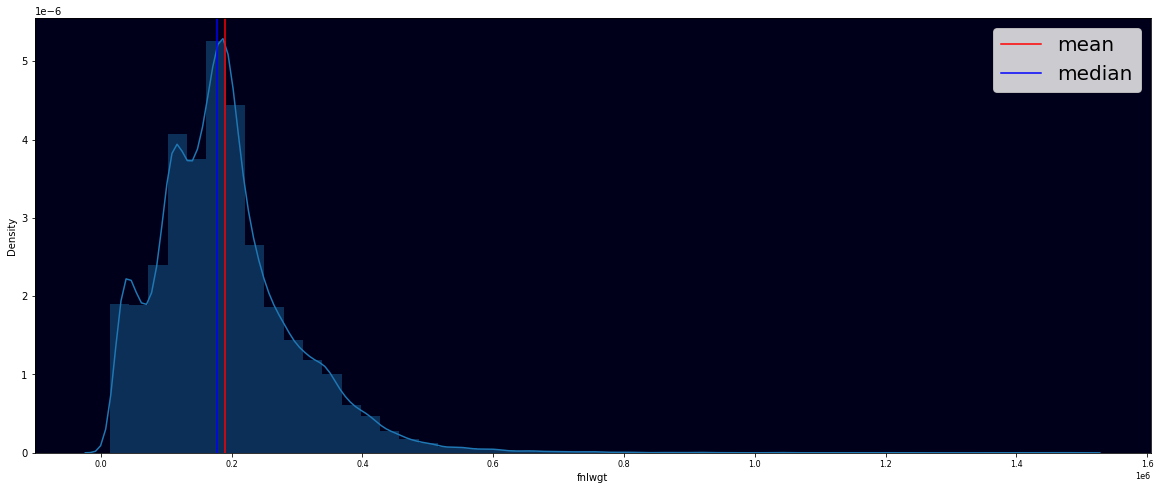

In [31]:
draw_distplot(column=df['fnlwgt'])

In [32]:
#Exploring education column
df.education.unique()

array(['Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college',
       'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool',
       '5th-6th', 'Prof-school', 'Assoc-voc', '1st-4th', 'Assoc-acdm'],
      dtype=object)

In [33]:
df.education.value_counts()

HS-grad         14197
Some-college     9790
Bachelors        7219
Masters          2392
Assoc-voc        1831
11th             1647
Assoc-acdm       1447
10th             1250
7th-8th           862
Prof-school       748
9th               684
12th              587
Doctorate         536
5th-6th           468
1st-4th           223
Preschool          76
Name: education, dtype: int64

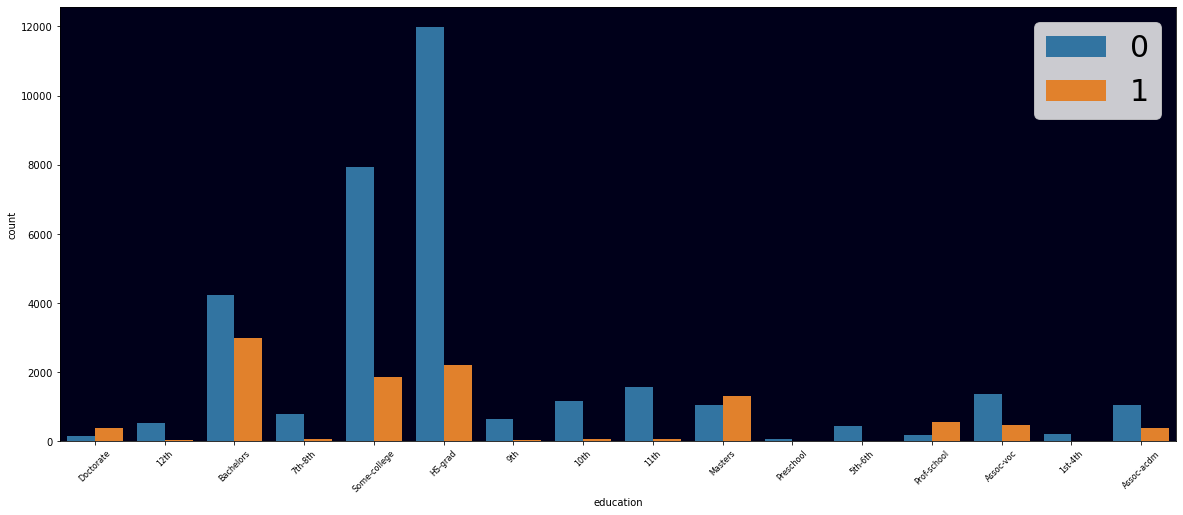

In [34]:
draw_countplot(countplot_x='education', countplot_hue='income_>50K', countplot_data=df)

There are 16 different categories of education
The highest number of values have education as HS_Grad and minimum are Pre-school
There are no missing values in the Education column

In [35]:
education_var = df['education'].unique()
for edu_var in education_var:
    print("For {}, the Education Number is {}"
          .format(edu_var, df[df['education'] == edu_var]['educational-num'].unique()))

For Doctorate, the Education Number is [16]
For 12th, the Education Number is [8]
For Bachelors, the Education Number is [13]
For 7th-8th, the Education Number is [4]
For Some-college, the Education Number is [10]
For HS-grad, the Education Number is [9]
For 9th, the Education Number is [5]
For 10th, the Education Number is [6]
For 11th, the Education Number is [7]
For Masters, the Education Number is [14]
For Preschool, the Education Number is [1]
For 5th-6th, the Education Number is [3]
For Prof-school, the Education Number is [15]
For Assoc-voc, the Education Number is [11]
For 1st-4th, the Education Number is [2]
For Assoc-acdm, the Education Number is [12]


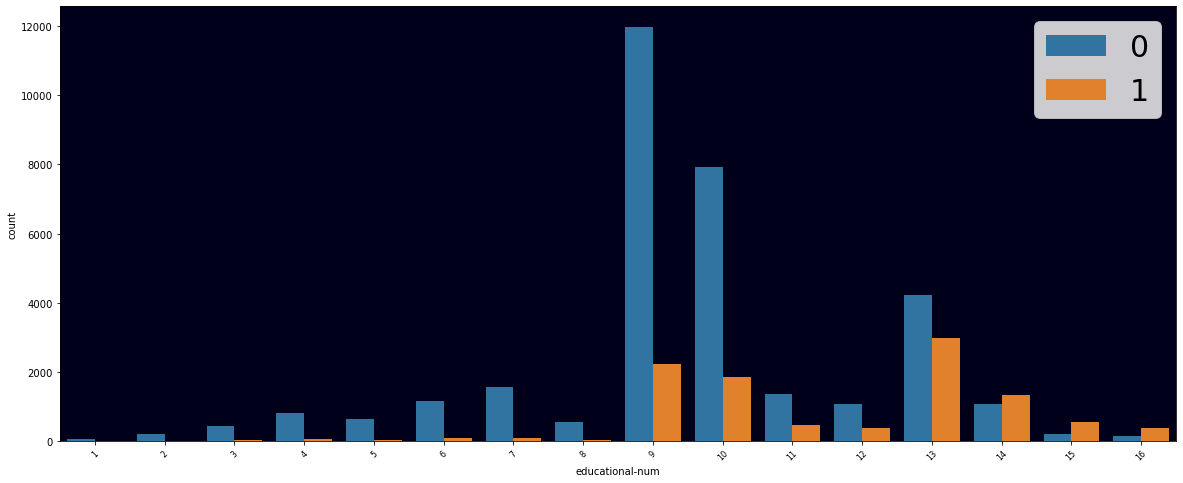

In [36]:
draw_countplot(countplot_x='educational-num', countplot_hue='income_>50K', countplot_data=df)

In [37]:
df['educational-num'].value_counts()

9     14197
10     9790
13     7219
14     2392
11     1831
7      1647
12     1447
6      1250
4       862
15      748
5       684
8       587
16      536
3       468
2       223
1        76
Name: educational-num, dtype: int64

In [38]:
#Exploring marital status column
df['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [39]:
df['marital-status'].value_counts()

Married-civ-spouse       20147
Never-married            14513
Divorced                  5971
Widowed                   1364
Separated                 1361
Married-spouse-absent      570
Married-AF-spouse           31
Name: marital-status, dtype: int64

The marital status column has 7 categories
The highest number of people have marital status as Married-civ-spouse, whereas lowest values are Married-AF-spouse.
The data has no missing values

In [40]:
#Exploring Occupation Column
df.occupation.unique()

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', nan, 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

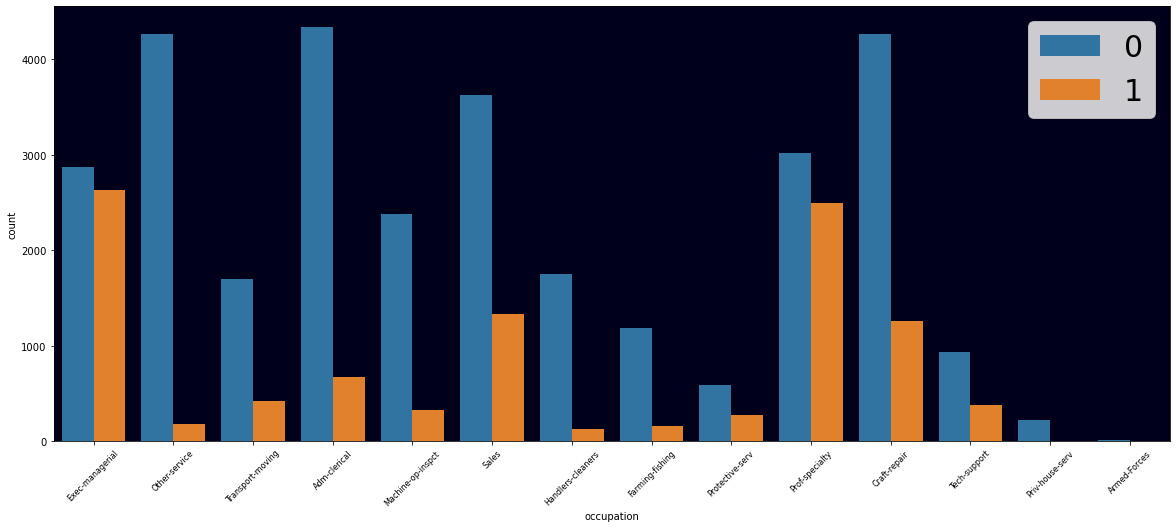

In [41]:
draw_countplot(countplot_x='occupation', countplot_hue='income_>50K', countplot_data=df)

In [42]:
df['occupation'].value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [43]:
df[df.occupation.isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


In [44]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [45]:
df.workclass.value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Other                  28
Name: workclass, dtype: int64

In [46]:
df.occupation.value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [47]:
df6 = df[df.occupation.isnull()]
df6[df6.workclass.notnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
641,17,Other,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,0
2040,30,Other,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,0
13583,20,Other,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,0
24860,23,Other,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,0
29122,17,Other,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,0
30895,18,Other,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,0
34548,20,Other,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,0
43715,18,Other,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0


There are missing values in occupation column, and have workclass also missing
Number of missing values = 2506, which are slightly higher than Workclass
The distribution among top occupations are quite similar in numbers (~5000)
The people who have workclass as other have occupation value Null as an addition in the dataset
There are 14 categories in Occupation column.

In [48]:
#Exploring Race Column
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

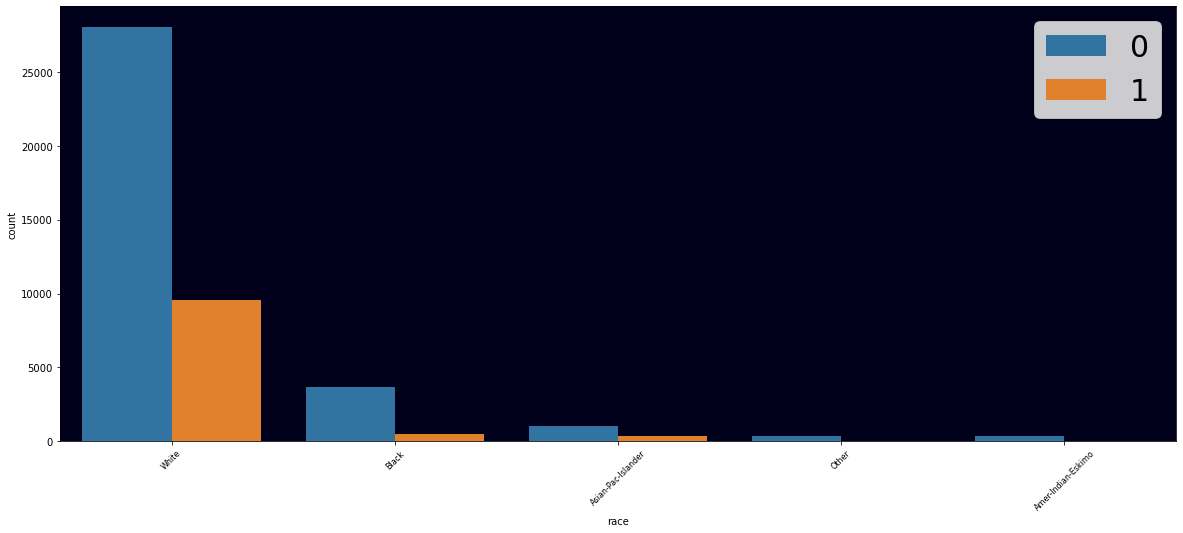

In [49]:
draw_countplot(countplot_x='race', countplot_hue='income_>50K', countplot_data=df)

Race column has 5 categories and no missing values
The highest number of people are white and rest of the numbers are significantly less
So we merge the significant less category Asian-Pac-Islander'and 'Amer-Indian-Eskimo to other category

In [50]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
df['race'].value_counts()

White    37572
Black     4218
Other     2167
Name: race, dtype: int64

In [51]:
# Exporing the Sex column

df.gender.unique()

array(['Male', 'Female'], dtype=object)

gender  income
Female  0         12967
        1          1590
Male    0         20472
        1          8928
Name: income, dtype: int64
------------------------------------------------


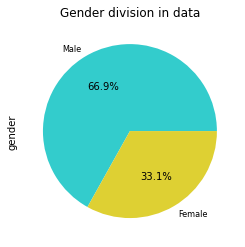

<Figure size 720x432 with 0 Axes>

------------------------------------------------


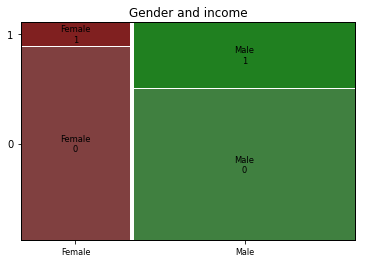

In [52]:
gender_income = pd.DataFrame({'gender': df['gender'], 'income': df['income_>50K']})
data = gender_income.income.groupby([gender_income.gender, gender_income.income]).size()
plt.title('Gender division in data')
print(data)
print('------------------------------------------------')
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()
print('------------------------------------------------')
mosaic(data, gap=0.01, title = "Gender and income")
plt.show()

Males have a higher number than Females (2:1 ratio approximately)
Gender column has 2 values only, male and female, and has no missing values

In [53]:
#Exploring the hours per week column
df['hours-per-week'].unique()

array([60, 15, 40, 50, 45, 25, 10, 12, 55, 30, 44, 32, 35, 39,  1, 52, 24,
       70, 72, 48, 20, 11, 65,  8, 68, 33, 16, 99, 29, 56, 62,  4, 43, 21,
       37, 38, 28, 75,  5, 36, 49, 22,  3, 46,  7,  6, 26, 42, 89,  2, 80,
       47, 58, 41, 13, 34, 14, 18, 23, 98, 57, 84, 64, 90, 96, 27, 53, 66,
       17, 51, 63, 86, 54, 92, 19, 74, 95,  9, 85, 78, 61, 31, 82, 59, 88,
       97, 67, 77, 87, 91, 81, 76, 73, 79])

In [54]:
df['hours-per-week'].value_counts()

40    20513
50     3810
45     2438
60     1969
35     1756
      ...  
97        2
88        2
82        1
87        1
79        1
Name: hours-per-week, Length: 94, dtype: int64

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


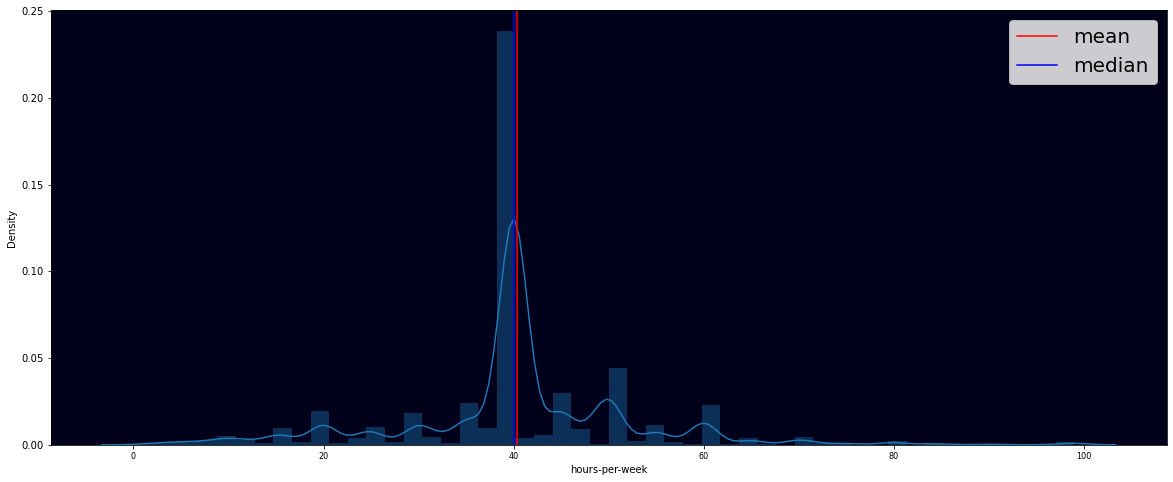

In [55]:
draw_distplot(column=df['hours-per-week'])

People with 40 hours per week have the highest count (20513)
Majority of the people have hours per week with 20 - 60, rest of the values are quite less.

In [56]:
#Exploring relationship column
df['relationship'].unique()

array(['Not-in-family', 'Own-child', 'Husband', 'Wife', 'Unmarried',
       'Other-relative'], dtype=object)

In [57]:
df['relationship'].value_counts()

Husband           17749
Not-in-family     11321
Own-child          6836
Unmarried          4602
Wife               2091
Other-relative     1358
Name: relationship, dtype: int64

In [58]:
pd.isnull(df["relationship"]).value_counts()

False    43957
Name: relationship, dtype: int64

In [59]:
#Exploring the Capital gain column
df['capital-gain'].unique()

array([99999,     0,  2653,  4386,  6849,  5178, 15024,  4416,  2964,
        2829,  2176,  5013,   594,  2174,  3137,  7688,  1086,  3674,
       14344,  4865,  7298,  9386, 27828,  7978,  3471, 14084,  1797,
        6497, 10520,  2414,  2580,  3103,  4650,  3942,  3325,  2354,
        2597, 13550,  2407,  4931, 20051,  4787,  1455,  1831,  5060,
        2202,  1173,  6418,  2105,  4101,  8614,  4064,  3411,  4508,
        3464,  2885, 25124,  7443,  3908,   914,  9562,  6514,  3887,
        2050,  2463,  3418,  5455,   114,   991,  2290,  2907, 15831,
        1151,  2036,  2961, 10605,  2329,  1506,  2977, 34095,  7430,
        1055,  2993, 22040,   401,  6612,  2936,  6723,  2538, 10566,
        1848, 41310,  2346,  2228,  6767,  1471, 15020, 25236,  3781,
        2009,  3273,  5721,  3432,  3818,  4934,  2635,  1424,  5556,
        2062,  4687,  6360,  1409,  6097,  1264, 11678,  1639, 18481,
        7896,  3456,  7262,  1111,  1731])

In [60]:
len(df['capital-gain'].unique())

122

In [61]:
df['capital-gain'].value_counts()

0        40330
15024      448
7688       370
7298       328
99999      228
         ...  
6612         1
1111         1
22040        1
1639         1
1731         1
Name: capital-gain, Length: 122, dtype: int64

In [62]:
df[df['capital-gain'] != 0].sample(50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
41216,31,Private,19491,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,2202,0,40,United-States,0
40999,49,Private,309033,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,Female,15024,0,60,United-States,1
6328,61,Federal-gov,95680,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Other,Male,3103,0,40,United-States,1
14452,36,Private,184659,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,1
4724,50,Private,95469,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,45,United-States,1
6595,62,Self-emp-inc,164616,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,1
10352,39,Private,191807,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,15024,0,50,United-States,1
40506,42,Private,47012,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States,1
28989,51,Private,122159,Some-college,10,Widowed,Prof-specialty,Not-in-family,White,Female,3325,0,40,United-States,0
31010,63,Private,294009,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,1


/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


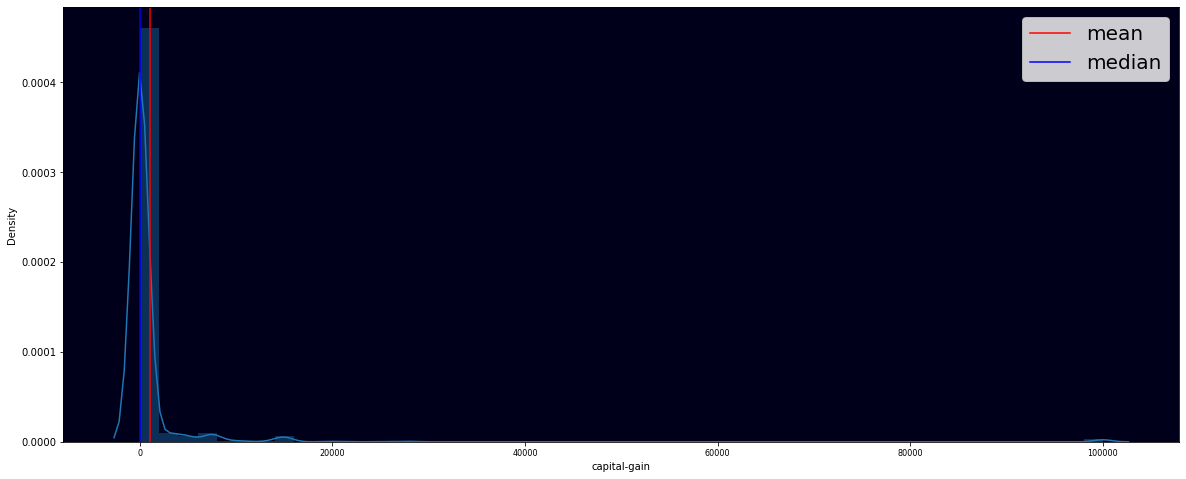

In [63]:
draw_distplot(column=df['capital-gain'])

In [64]:
print(df['capital-gain'].value_counts())

0        40330
15024      448
7688       370
7298       328
99999      228
         ...  
6612         1
1111         1
22040        1
1639         1
1731         1
Name: capital-gain, Length: 122, dtype: int64


There are 40330 rows where capital gain = 0.
There are 3627 rows where capital gain has a non-zero value
Capital gain has 122 unique values

In [65]:
#Exploring the capital loss column

df['capital-loss'].unique()

array([   0, 1848, 2377, 1902, 1590, 1887, 1485, 1977, 1579, 1876, 1408,
       2042, 1672, 1980, 1825, 2002, 1740, 2339, 1719, 1669, 1564, 2001,
       2258, 2444, 1602, 1762, 1628, 2205, 1617, 1573, 2415, 2179, 1721,
       1741, 2051, 1651,  213, 2603, 1974, 2824, 2206, 1594,  810, 2559,
       1504, 1380, 2267, 1429, 2246, 1539, 1816, 2231, 3770,  625, 2129,
       2057, 1092, 2149, 1510,  880, 2163, 2080, 2392, 2282, 1340,  419,
       2472,  323, 2174, 1870, 1668, 2467, 1411, 2352, 1138, 3900, 1648,
       1755,  653, 1726, 1944, 2754, 2547, 2465, 3004, 2238, 3175, 4356,
       1844,  974, 1735, 1258, 2457, 3683, 1421, 2201,  155])

In [66]:
len(df['capital-loss'].unique())

97

In [67]:
df['capital-loss'].value_counts()

0       41884
1902      276
1977      225
1887      201
2415       65
        ...  
2467        1
1870        1
2465        1
2163        1
1539        1
Name: capital-loss, Length: 97, dtype: int64

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


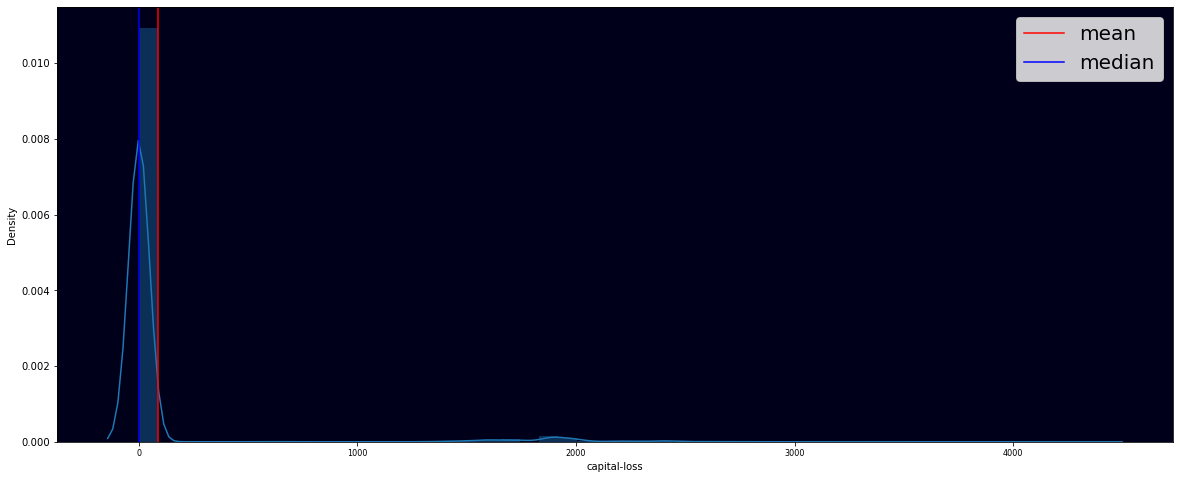

In [68]:
draw_distplot(column=df['capital-loss'])

In [69]:
print(df['capital-loss'].value_counts())

0       41884
1902      276
1977      225
1887      201
2415       65
        ...  
2467        1
1870        1
2465        1
2163        1
1539        1
Name: capital-loss, Length: 97, dtype: int64


There are 41884 rows where capital loss is set to 0.
The capital loss column has 97 unique values

In [70]:
#Exploring native-country column
df['native-country'].unique()

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany', nan,
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

In [71]:
print(df['native-country'].value_counts())

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

Text(0.5, 1.0, 'Total adults from each Country')

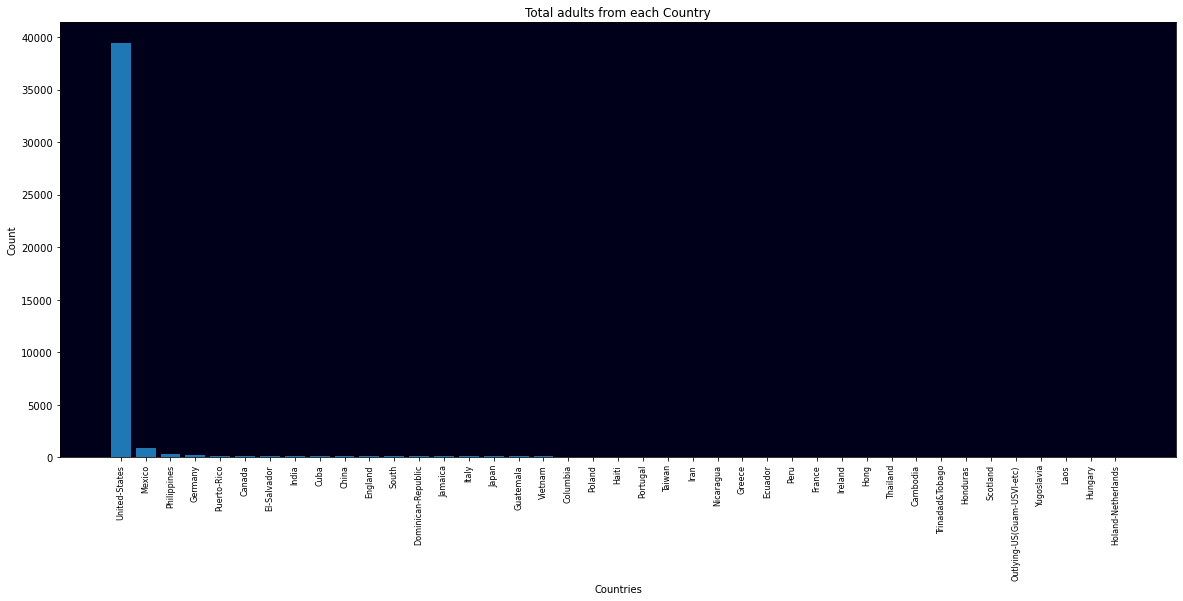

In [72]:
country_count = df['native-country'].value_counts()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [73]:
df['native-country'].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

In [74]:
df['native-country'].isnull().sum()

763

<AxesSubplot:xlabel='count', ylabel='native-country'>

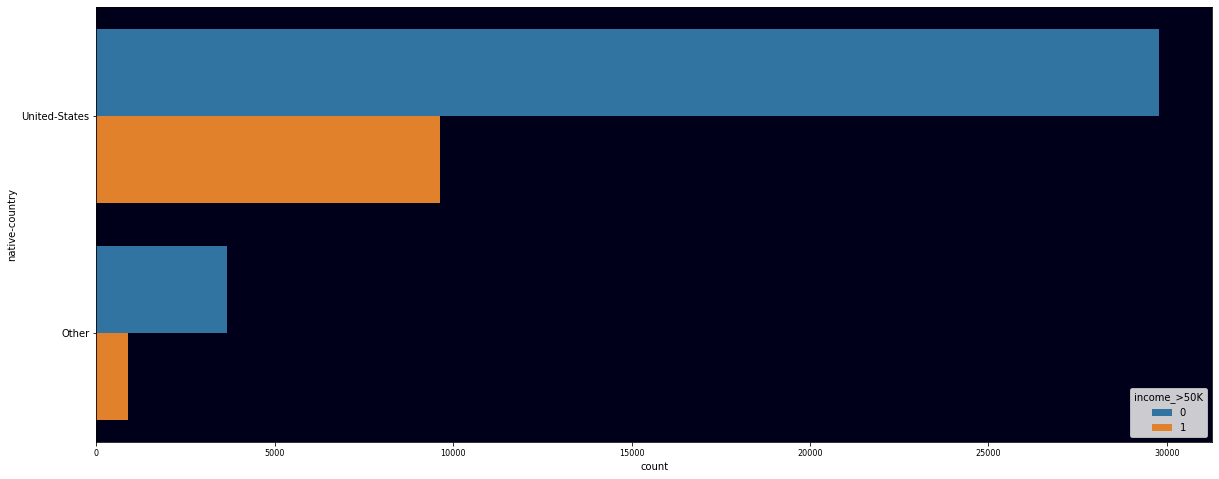

In [75]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)
df['native-country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'native-country', hue = 'income_>50K', data = df)

In [76]:
df['native-country'].isnull().sum()

0

In [77]:
df['native-country'].value_counts()

United-States    39429
Other             4528
Name: native-country, dtype: int64

Majority of the count has Native_country as US
Rest of the countries have quite low counts
There are missing values in the set (763).

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


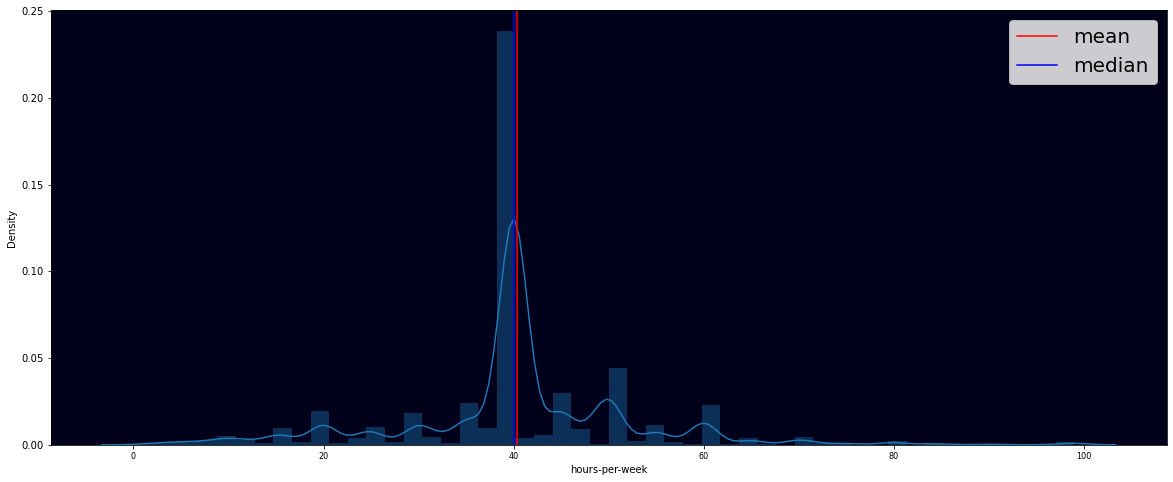

In [78]:
#Exploring hours per week coulmn
draw_distplot(column=df['hours-per-week'])

Bivariate and multivariate analysis

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'United-States'), Text(1, 0, 'Other')])

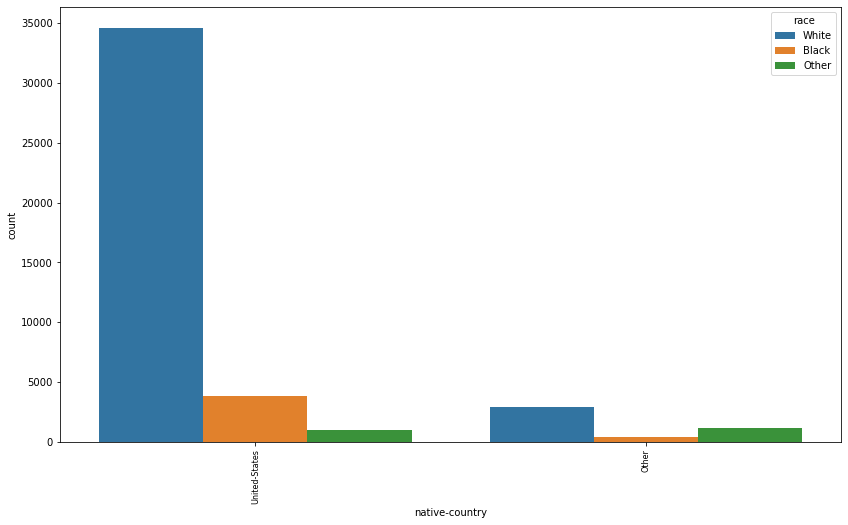

In [79]:
# Relationship between Native Country and Race columns
plt.figure(figsize= (14,8))
sns.countplot(df['native-country'], hue=df['race'])
plt.xticks(rotation = 90)

Majority of the people in US are Whites, other races are significantly low. Black still have a considerable number as compared to rest.

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

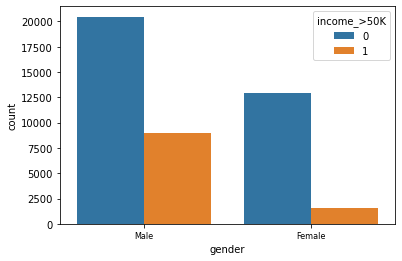

In [80]:
# Checking relationship between income and gender

sns.countplot(df['gender'], hue = df['income_>50K'] )

Males have a higher chance of having income more than 50K than women

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Other')])

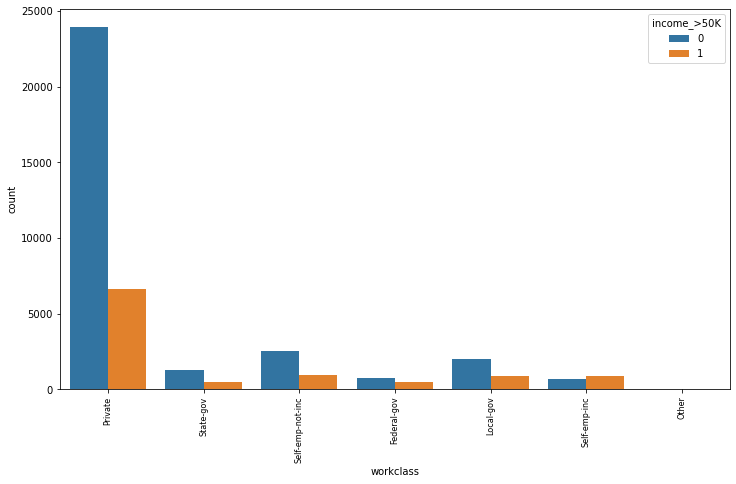

In [81]:
# Checking relationship between income and Workclass

plt.figure(figsize = (12,7))
sns.countplot(df['workclass'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

Highest number of people having income more than 50K belong to Private class.
The people in category 'Self-emp-inc' have more number of high earners than the low earners (<50K)

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Doctorate'),
  Text(1, 0, '12th'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, '7th-8th'),
  Text(4, 0, 'Some-college'),
  Text(5, 0, 'HS-grad'),
  Text(6, 0, '9th'),
  Text(7, 0, '10th'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Masters'),
  Text(10, 0, 'Preschool'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Prof-school'),
  Text(13, 0, 'Assoc-voc'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Assoc-acdm')])

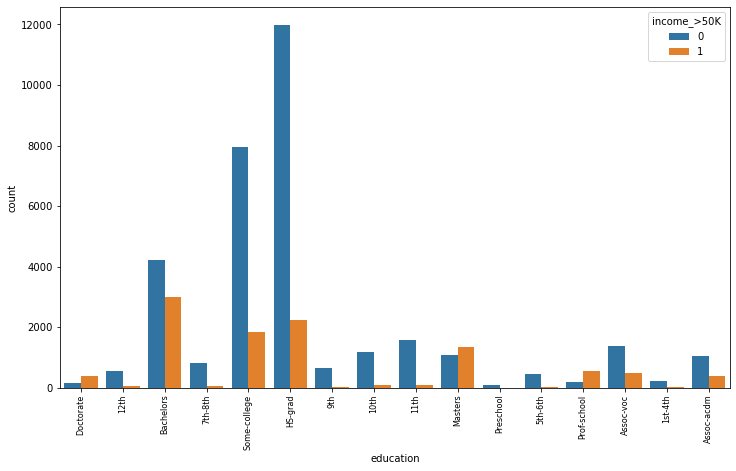

In [82]:
#Checking income relation with education

plt.figure(figsize = (12,7))
sns.countplot(df['education'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

Bachelors have a high chance of having income more than 50k
Number of people having doctorate,prof-school and masters have higher number of high earners than low earners (<50k)
The categories which imply school have minimum chance of getting higher than 50k
College and HS grad have same ratio of less than 50K to more than 50K

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Own-child'),
  Text(2, 0, 'Husband'),
  Text(3, 0, 'Wife'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

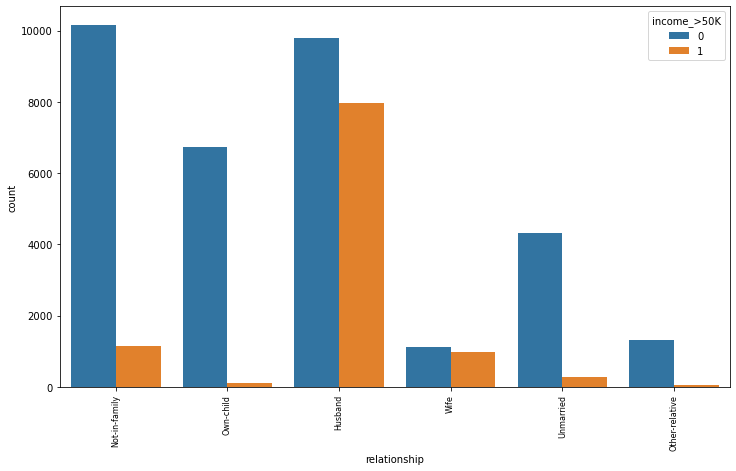

In [83]:
# Checking relationship connection with income

plt.figure(figsize = (12,7))
sns.countplot(df['relationship'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

Maximum chances of wife to have income more than 50k
Husband relation also has a high chance of getting income more than 50k
Rest of the relations have very less chances to be more than 50k

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

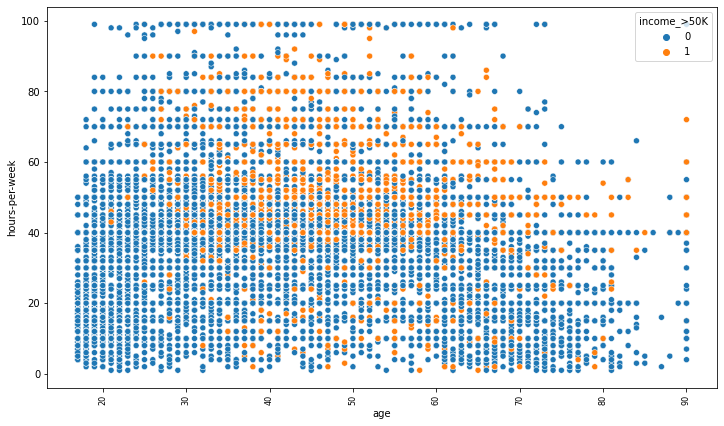

In [84]:
#Checking relation between age and income

plt.figure(figsize = (12,7))
sns.scatterplot(x = df['age'], y = df['hours-per-week'], hue=df['income_>50K'])
plt.xticks(rotation = 90)

People below 28 need to work above 50 hours per week to get chance to be more than 50k, people below 28 working less than 40 hours have no chance to be more than 50K earner.
Majority of high earners work for more than 40h.
Number of work hours decrease after the age of 65, along with >50k earners
People working more than 60 hours per week keep on decreasing as the number of hours increase.

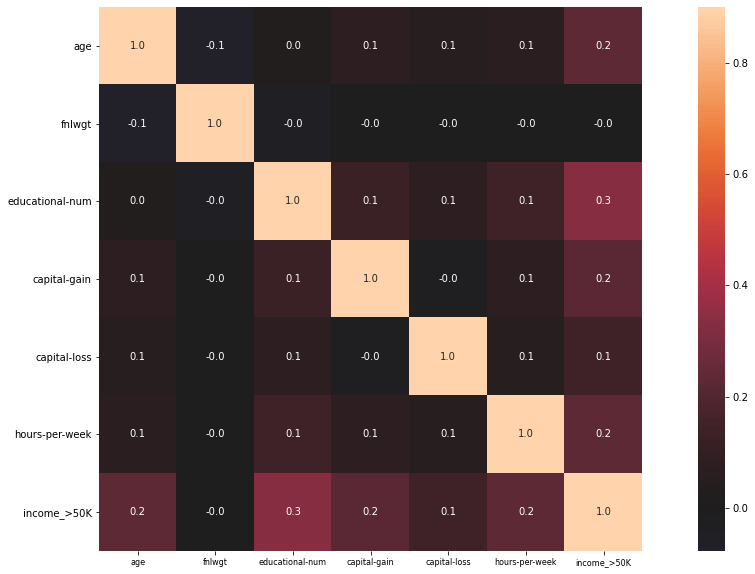

In [85]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()

Income has highest correlation with Education-num (30%)
Income has correlation with capital gain, hours per week and Age (20%, 20% and 20% respectively)
Income has negative correlation with Fnlwgt

In [86]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [87]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income_>50K           0
dtype: int64

In [88]:
pd.isnull(df["native-country"]).value_counts()

False    43957
Name: native-country, dtype: int64

In [89]:
#Filling the values in Workplace, Occupation using the most frequent values 

df['workclass'].fillna('Private', inplace = True)
df['occupation'].fillna('Prof-specialty', inplace = True)

In [90]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [91]:
# Combining data in Workclass column in a meaningful manner
df.workclass = df.workclass.replace('State-gov','Gov')
df.workclass = df.workclass.replace('Local-gov','Gov')
df.workclass = df.workclass.replace('Self-emp-not-inc',' Private')

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Gov'),
  Text(2, 0, ' Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Self-emp-inc'),
  Text(5, 0, 'Other')])

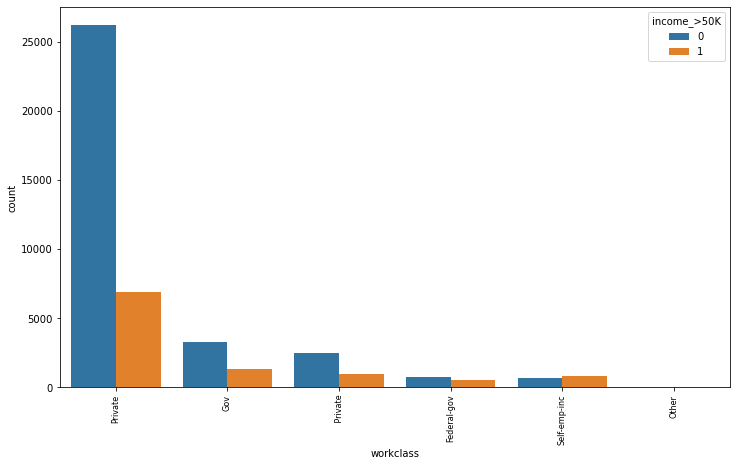

In [92]:
plt.figure(figsize = (12,7))
sns.countplot(df['workclass'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Doctorate'),
  Text(1, 0, '12th'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, '7th-8th'),
  Text(4, 0, 'Some-college'),
  Text(5, 0, 'HS-grad'),
  Text(6, 0, '9th'),
  Text(7, 0, '10th'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Masters'),
  Text(10, 0, 'Preschool'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Prof-school'),
  Text(13, 0, 'Assoc-voc'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Assoc-acdm')])

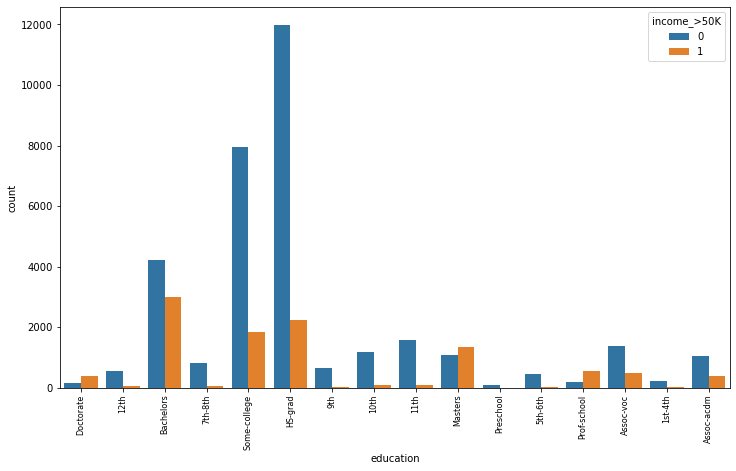

In [93]:
# Combining data in Education in a meaningful manner 

plt.figure(figsize = (12,7))
sns.countplot(df['education'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

In [94]:
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Doctorate'),
  Text(1, 0, 'School'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, 'HS-grad'),
  Text(5, 0, 'Masters'),
  Text(6, 0, 'Prof-school'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, 'Assoc-acdm')])

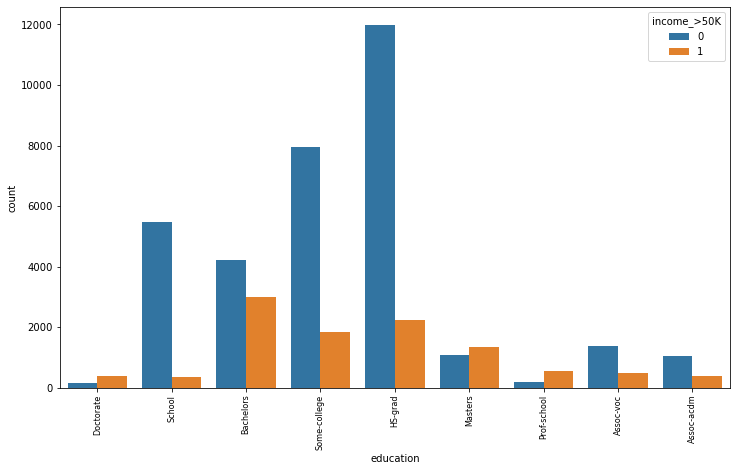

In [95]:
plt.figure(figsize = (12,7))
sns.countplot(df['education'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Married-civ-spouse'),
  Text(3, 0, 'Widowed'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

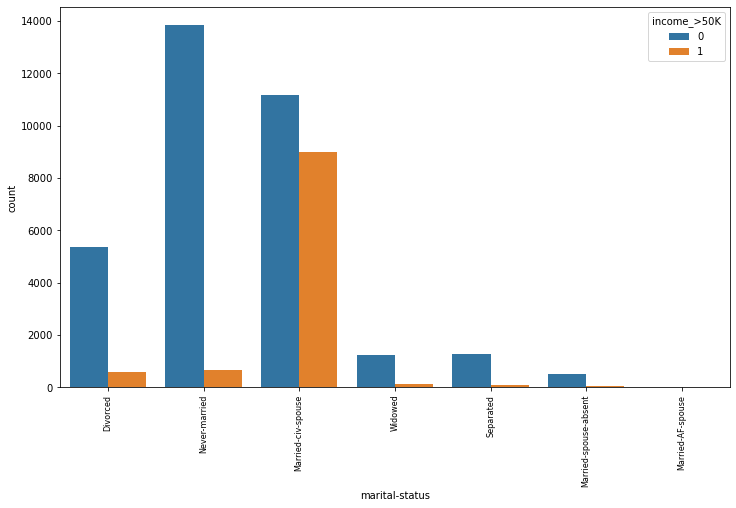

In [96]:
# Converting MaritalStatus into meaninful data

plt.figure(figsize = (12,7))
sns.countplot(df['marital-status'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

In [97]:
df['marital-status'] = df['marital-status'].replace(['Divorced', 'Married-spouse-absent','Separated','Widowed','Married-AF-spouse'],'No spouse')

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'No spouse'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Married-civ-spouse')])

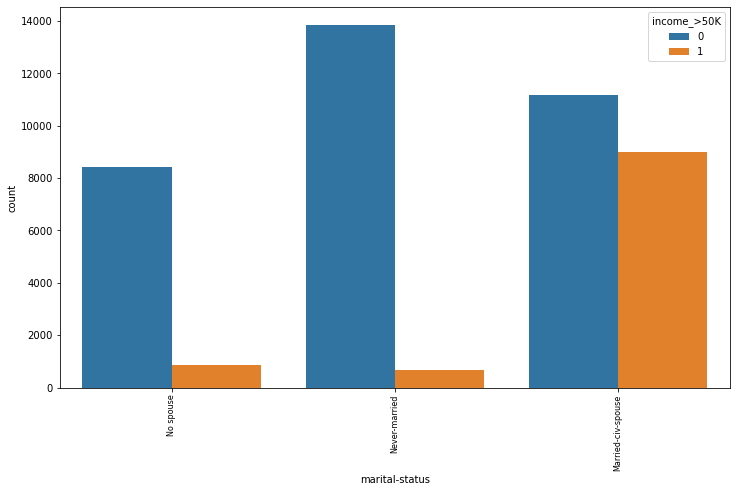

In [98]:
plt.figure(figsize = (12,7))
sns.countplot(df['marital-status'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Own-child'),
  Text(2, 0, 'Husband'),
  Text(3, 0, 'Wife'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

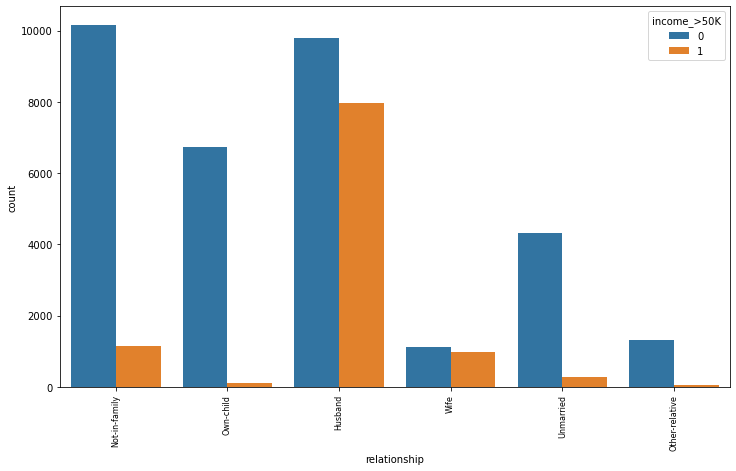

In [99]:
# Converting Relationship into meaningful data

plt.figure(figsize = (12,7))
sns.countplot(df['relationship'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

In [100]:
df.relationship = df.relationship.replace(['Not-in-family','Own-child','Unmarried','Other-relative'],'Others')

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Others'), Text(1, 0, 'Husband'), Text(2, 0, 'Wife')])

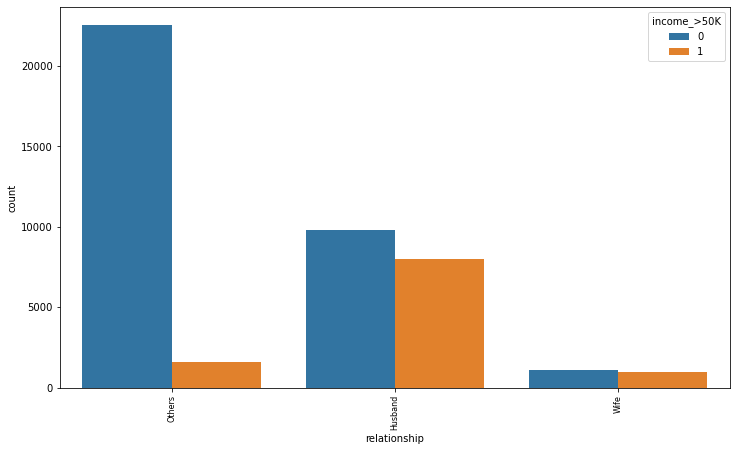

In [101]:
plt.figure(figsize = (12,7))
sns.countplot(df['relationship'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'White'), Text(1, 0, 'Black'), Text(2, 0, 'Other')])

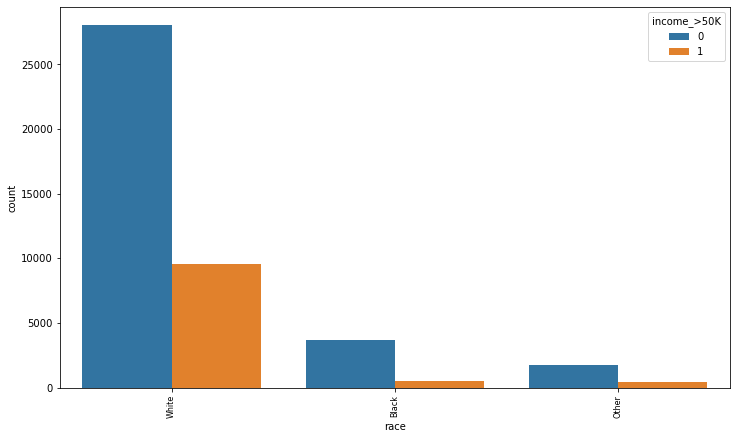

In [102]:
# Converting Race into lesser but meaningful categories

plt.figure(figsize = (12,7))
sns.countplot(df['race'], hue = df['income_>50K'])
plt.xticks(rotation = 90)

Outlier detection

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income_>50K              AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

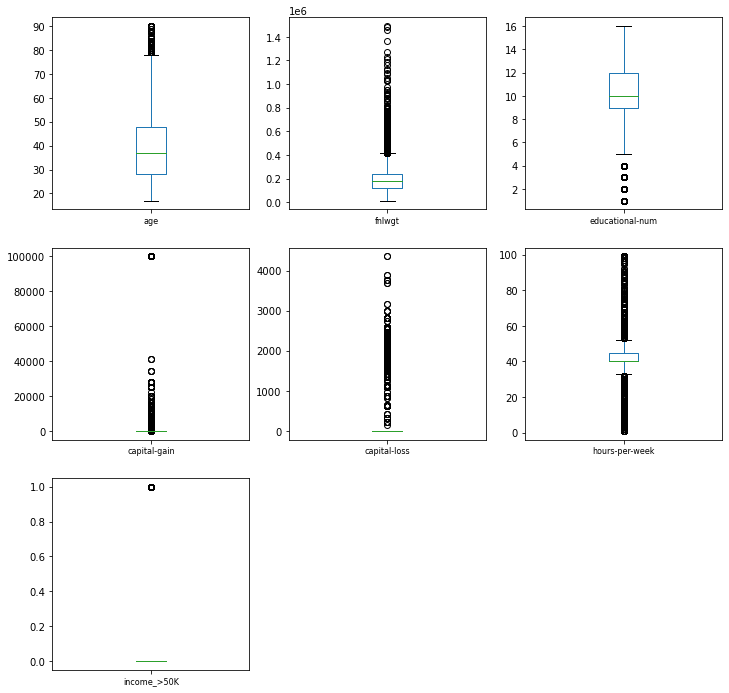

In [103]:
#Plotting boxplot for looking at the outliers

df.plot(kind = 'box', layout = (3,3), sharex = False, subplots = True, figsize = (12,12))

We see outliers in almost all of the columns

In [104]:
from scipy.stats import zscore

In [105]:
zs = zscore(df[['age','fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [106]:
df[((abs(zs)<3).all(axis=1))]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
1,17,Private,244602,School,8,Never-married,Other-service,Others,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,Gov,110199,School,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,Gov,149248,Some-college,10,Never-married,Other-service,Others,Black,Male,0,0,40,United-States,0
5,59,Gov,105363,HS-grad,9,Never-married,Adm-clerical,Others,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Others,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,No spouse,Sales,Others,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Others,White,Female,0,0,35,United-States,0


In [107]:
43957-40215

3742

By removing the outliers, we will be losing 3742 rows from our data.

In [108]:
data_wo_outlier = df[((abs(zs)<3).all(axis=1))==False]

In [109]:
data_wo_outlier['income_>50K'].value_counts()

0    2145
1    1597
Name: income_>50K, dtype: int64

If we drop the outliers, we will be dropping around 15% of the rows which have income greater than 50k, hence we choose not to drop the outliers data.

Skewness treatment

In [110]:
df.skew()

age                 0.559838
fnlwgt              1.459951
educational-num    -0.318839
capital-gain       11.760659
capital-loss        4.546897
hours-per-week      0.238426
income_>50K         1.222236
dtype: float64

We will be treating the Fnlwgt, Capital_gain and Capital_loss column for skewness.

We will use sqrt transform since it contains 0 values.

In [111]:
df['fnlwgt'] = np.sqrt(df['fnlwgt'])

In [112]:
df.skew()

age                 0.559838
fnlwgt              0.198508
educational-num    -0.318839
capital-gain       11.760659
capital-loss        4.546897
hours-per-week      0.238426
income_>50K         1.222236
dtype: float64

In [113]:
#Treating Capital gain and loss columns using cbrt since the skewness values are quite high

df['capital-gain'] = np.cbrt(df['capital-gain'])
df['capital-loss'] = np.cbrt(df['capital-loss'])

In [114]:
df.skew()

age                0.559838
fnlwgt             0.198508
educational-num   -0.318839
capital-gain       4.159577
capital-loss       4.308106
hours-per-week     0.238426
income_>50K        1.222236
dtype: float64

In [115]:
#Applying cbrt again to decrease skewness

df['capital-gain'] = np.cbrt(df['capital-gain'])
df['capital-loss'] = np.cbrt(df['capital-loss'])

In [116]:
df.skew()

age                0.559838
fnlwgt             0.198508
educational-num   -0.318839
capital-gain       3.124348
capital-loss       4.277487
hours-per-week     0.238426
income_>50K        1.222236
dtype: float64

It is observed that no major impact by treating skewness further, so we will continue further with the received skewness.

In [117]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,605.330488,Doctorate,16,No spouse,Exec-managerial,Others,White,Male,3.59381,0.0,60,United-States,1
1,17,Private,494.572543,School,8,Never-married,Other-service,Others,White,Male,0.00000,0.0,15,United-States,0
2,31,Private,417.373933,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,40,United-States,1
3,58,Gov,331.962347,School,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.00000,0.0,40,United-States,0
4,25,Gov,386.326287,Some-college,10,Never-married,Other-service,Others,Black,Male,0.00000,0.0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,262.644246,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,50,United-States,1
43953,19,Private,341.411775,HS-grad,9,Never-married,Other-service,Others,White,Female,0.00000,0.0,40,United-States,0
43954,30,Private,444.912351,Some-college,10,No spouse,Sales,Others,White,Male,0.00000,0.0,58,United-States,0
43955,46,Private,312.862590,Bachelors,13,Never-married,Sales,Others,White,Female,0.00000,0.0,35,United-States,0


In [118]:
df7 = df.copy()

In [119]:
df7

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,605.330488,Doctorate,16,No spouse,Exec-managerial,Others,White,Male,3.59381,0.0,60,United-States,1
1,17,Private,494.572543,School,8,Never-married,Other-service,Others,White,Male,0.00000,0.0,15,United-States,0
2,31,Private,417.373933,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,40,United-States,1
3,58,Gov,331.962347,School,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.00000,0.0,40,United-States,0
4,25,Gov,386.326287,Some-college,10,Never-married,Other-service,Others,Black,Male,0.00000,0.0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,262.644246,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,50,United-States,1
43953,19,Private,341.411775,HS-grad,9,Never-married,Other-service,Others,White,Female,0.00000,0.0,40,United-States,0
43954,30,Private,444.912351,Some-college,10,No spouse,Sales,Others,White,Male,0.00000,0.0,58,United-States,0
43955,46,Private,312.862590,Bachelors,13,Never-married,Sales,Others,White,Female,0.00000,0.0,35,United-States,0


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df7.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [121]:
df7['workclass'] = le.fit_transform(df7['workclass'])
df7['education'] = le.fit_transform(df7['education'])
df7['marital-status'] = le.fit_transform(df7['marital-status'])
df7['occupation'] = le.fit_transform(df7['occupation'])
df7['relationship'] = le.fit_transform(df7['relationship'])
df7['native-country'] = le.fit_transform(df7['native-country'])
df7['race'] = le.fit_transform(df7['race'])
df7['gender'] = le.fit_transform(df7['gender'])

In [122]:
df7

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,4,605.330488,3,16,2,3,1,2,1,3.59381,0.0,60,1,1
1,17,4,494.572543,7,8,1,7,1,2,1,0.00000,0.0,15,1,0
2,31,4,417.373933,2,13,0,3,0,2,1,0.00000,0.0,40,1,1
3,58,2,331.962347,7,4,0,13,0,2,1,0.00000,0.0,40,1,0
4,25,2,386.326287,8,10,1,7,1,0,1,0.00000,0.0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,4,262.644246,2,13,0,3,0,2,1,0.00000,0.0,50,1,1
43953,19,4,341.411775,4,9,1,7,1,2,0,0.00000,0.0,40,1,0
43954,30,4,444.912351,8,10,2,11,1,2,1,0.00000,0.0,58,1,0
43955,46,4,312.862590,2,13,1,11,1,2,0,0.00000,0.0,35,1,0


In [123]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,605.330488,Doctorate,16,No spouse,Exec-managerial,Others,White,Male,3.59381,0.0,60,United-States,1
1,17,Private,494.572543,School,8,Never-married,Other-service,Others,White,Male,0.00000,0.0,15,United-States,0
2,31,Private,417.373933,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,40,United-States,1
3,58,Gov,331.962347,School,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.00000,0.0,40,United-States,0
4,25,Gov,386.326287,Some-college,10,Never-married,Other-service,Others,Black,Male,0.00000,0.0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,262.644246,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,50,United-States,1
43953,19,Private,341.411775,HS-grad,9,Never-married,Other-service,Others,White,Female,0.00000,0.0,40,United-States,0
43954,30,Private,444.912351,Some-college,10,No spouse,Sales,Others,White,Male,0.00000,0.0,58,United-States,0
43955,46,Private,312.862590,Bachelors,13,Never-married,Sales,Others,White,Female,0.00000,0.0,35,United-States,0


In [124]:
df['educational-num'] = df['educational-num'].replace([1,2,3,4,5,6,7,8],4)

In [125]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,605.330488,Doctorate,16,No spouse,Exec-managerial,Others,White,Male,3.59381,0.0,60,United-States,1
1,17,Private,494.572543,School,4,Never-married,Other-service,Others,White,Male,0.00000,0.0,15,United-States,0
2,31,Private,417.373933,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,40,United-States,1
3,58,Gov,331.962347,School,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.00000,0.0,40,United-States,0
4,25,Gov,386.326287,Some-college,10,Never-married,Other-service,Others,Black,Male,0.00000,0.0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,262.644246,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,50,United-States,1
43953,19,Private,341.411775,HS-grad,9,Never-married,Other-service,Others,White,Female,0.00000,0.0,40,United-States,0
43954,30,Private,444.912351,Some-college,10,No spouse,Sales,Others,White,Male,0.00000,0.0,58,United-States,0
43955,46,Private,312.862590,Bachelors,13,Never-married,Sales,Others,White,Female,0.00000,0.0,35,United-States,0


In [126]:
df8=df.copy()

In [127]:
one_hot_encoded_data = pd.get_dummies(df8, columns = ['workclass','marital-status','occupation','relationship','race','gender','native-country'])
one_hot_encoded_data

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_ Private,workclass_Federal-gov,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,67,605.330488,Doctorate,16,3.59381,0.0,60,1,0,0,...,0,1,0,0,0,1,0,1,0,1
1,17,494.572543,School,4,0.00000,0.0,15,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,31,417.373933,Bachelors,13,0.00000,0.0,40,1,0,0,...,1,0,0,0,0,1,0,1,0,1
3,58,331.962347,School,4,0.00000,0.0,40,0,0,0,...,1,0,0,0,0,1,0,1,0,1
4,25,386.326287,Some-college,10,0.00000,0.0,40,0,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,262.644246,Bachelors,13,0.00000,0.0,50,1,0,0,...,1,0,0,0,0,1,0,1,0,1
43953,19,341.411775,HS-grad,9,0.00000,0.0,40,0,0,0,...,0,1,0,0,0,1,1,0,0,1
43954,30,444.912351,Some-college,10,0.00000,0.0,58,0,0,0,...,0,1,0,0,0,1,0,1,0,1
43955,46,312.862590,Bachelors,13,0.00000,0.0,35,0,0,0,...,0,1,0,0,0,1,1,0,0,1


In [128]:
one_hot_encoded_data.drop('education',axis='columns',inplace=True)

In [129]:
one_hot_encoded_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_ Private,workclass_Federal-gov,workclass_Gov,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,67,605.330488,16,3.59381,0.0,60,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,17,494.572543,4,0.00000,0.0,15,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,31,417.373933,13,0.00000,0.0,40,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,58,331.962347,4,0.00000,0.0,40,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
4,25,386.326287,10,0.00000,0.0,40,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,262.644246,13,0.00000,0.0,50,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
43953,19,341.411775,9,0.00000,0.0,40,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
43954,30,444.912351,10,0.00000,0.0,58,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
43955,46,312.862590,13,0.00000,0.0,35,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1


In [130]:
one_hot_encoded_data.drop('income_>50K',axis='columns',inplace=True)

In [131]:
one_hot_encoded_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Other,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,67,605.330488,16,3.59381,0.0,60,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,17,494.572543,4,0.00000,0.0,15,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,31,417.373933,13,0.00000,0.0,40,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,58,331.962347,4,0.00000,0.0,40,0,0,1,0,...,1,0,0,0,0,1,0,1,0,1
4,25,386.326287,10,0.00000,0.0,40,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,262.644246,13,0.00000,0.0,50,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
43953,19,341.411775,9,0.00000,0.0,40,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
43954,30,444.912351,10,0.00000,0.0,58,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
43955,46,312.862590,13,0.00000,0.0,35,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1


In [132]:
#Models

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(one_hot_encoded_data,df['income_>50K'] , test_size=0.3, random_state=0)

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
#testing accuracy lr
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10066
           1       0.69      0.58      0.63      3122

    accuracy                           0.84     13188
   macro avg       0.79      0.75      0.77     13188
weighted avg       0.83      0.84      0.84     13188



In [136]:
#training accuracy lr
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     23373
           1       0.71      0.59      0.64      7396

    accuracy                           0.84     30769
   macro avg       0.79      0.76      0.77     30769
weighted avg       0.84      0.84      0.84     30769



In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [138]:
#testing accuracy dt
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10066
           1       0.76      0.58      0.66      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.76      0.79     13188
weighted avg       0.85      0.86      0.85     13188



In [139]:
#training accuracy dt
print(classification_report(y_train, y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     23373
           1       0.81      0.62      0.70      7396

    accuracy                           0.87     30769
   macro avg       0.85      0.79      0.81     30769
weighted avg       0.87      0.87      0.87     30769



In [140]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [141]:
#testing accuracy rfc
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10066
           1       0.75      0.62      0.68      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.78      0.79     13188
weighted avg       0.85      0.86      0.86     13188



In [142]:
#training accuracy rfc
print(classification_report(y_train, y_pred_train_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23373
           1       1.00      0.97      0.98      7396

    accuracy                           0.99     30769
   macro avg       0.99      0.98      0.99     30769
weighted avg       0.99      0.99      0.99     30769



In [143]:
#Support Vector Classifier svc
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
y_pred_train_svc = svc.predict(x_train)

In [144]:
#testing accuracy svc
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     10066
           1       0.00      0.00      0.00      3122

    accuracy                           0.76     13188
   macro avg       0.38      0.50      0.43     13188
weighted avg       0.58      0.76      0.66     13188



/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [145]:
#training accuracy svc
print(classification_report(y_train, y_pred_train_svc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     23373
           1       0.00      0.00      0.00      7396

    accuracy                           0.76     30769
   macro avg       0.38      0.50      0.43     30769
weighted avg       0.58      0.76      0.66     30769



/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [146]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
y_pred_train_gnb = gnb.predict(x_train)

In [147]:
#testing accuracy gnb
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     10066
           1       0.50      0.84      0.63      3122

    accuracy                           0.76     13188
   macro avg       0.72      0.79      0.73     13188
weighted avg       0.83      0.76      0.78     13188



In [148]:
#training accuracy gnb
print(classification_report(y_train, y_pred_train_gnb))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     23373
           1       0.51      0.84      0.63      7396

    accuracy                           0.77     30769
   macro avg       0.72      0.79      0.73     30769
weighted avg       0.83      0.77      0.78     30769



In [149]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)
gbtc.fit(x_train,y_train)
y_pred_gbtc = gbtc.predict(x_test)
y_pred_train_gbtc = gbtc.predict(x_train)

In [150]:
#testing accuracy gtbc
print(classification_report(y_test, y_pred_gbtc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91     10066
           1       0.78      0.60      0.68      3122

    accuracy                           0.87     13188
   macro avg       0.83      0.78      0.80     13188
weighted avg       0.86      0.87      0.86     13188



In [151]:
#training accuracy gbtc
print(classification_report(y_train, y_pred_train_gbtc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23373
           1       0.80      0.61      0.69      7396

    accuracy                           0.87     30769
   macro avg       0.84      0.78      0.81     30769
weighted avg       0.87      0.87      0.86     30769



In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [153]:
#testing accuracy knn
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     10066
           1       0.57      0.40      0.47      3122

    accuracy                           0.79     13188
   macro avg       0.70      0.65      0.67     13188
weighted avg       0.77      0.79      0.77     13188



In [154]:
#training accuracy knn
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     23373
           1       0.76      0.56      0.64      7396

    accuracy                           0.85     30769
   macro avg       0.81      0.75      0.78     30769
weighted avg       0.84      0.85      0.84     30769



In [155]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [156]:
#testing accuracy knn
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     10066
           1       0.57      0.40      0.47      3122

    accuracy                           0.79     13188
   macro avg       0.70      0.65      0.67     13188
weighted avg       0.77      0.79      0.77     13188



In [157]:
#training accuracy knn
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     23373
           1       0.76      0.56      0.64      7396

    accuracy                           0.85     30769
   macro avg       0.81      0.75      0.78     30769
weighted avg       0.84      0.85      0.84     30769



In [158]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [159]:
#testing accuracy knn
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     10066
           1       0.61      0.48      0.53      3122

    accuracy                           0.80     13188
   macro avg       0.73      0.69      0.71     13188
weighted avg       0.79      0.80      0.79     13188



In [160]:
#training accuracy knn
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     23373
           1       0.77      0.62      0.69      7396

    accuracy                           0.87     30769
   macro avg       0.83      0.78      0.80     30769
weighted avg       0.86      0.87      0.86     30769



In [161]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred_ad = ad.predict(x_test)
y_pred_train_ad = ad.predict(x_train)

In [162]:
#testing accuracy ad
print(classification_report(y_test, y_pred_ad))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10066
           1       0.75      0.62      0.68      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.78      0.79     13188
weighted avg       0.86      0.86      0.86     13188



In [163]:
#training accuracy ad
print(classification_report(y_train, y_pred_train_ad))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     23373
           1       0.76      0.61      0.68      7396

    accuracy                           0.86     30769
   macro avg       0.82      0.78      0.80     30769
weighted avg       0.86      0.86      0.86     30769



In [356]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_dataset = sc.fit_transform(one_hot_encoded_data)
x = pd.DataFrame(scaled_dataset,columns=one_hot_encoded_data.columns)

In [361]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                43957 non-null  float64
 1   fnlwgt                             43957 non-null  float64
 2   educational-num                    43957 non-null  float64
 3   capital-gain                       43957 non-null  float64
 4   capital-loss                       43957 non-null  float64
 5   hours-per-week                     43957 non-null  float64
 6   workclass_ Private                 43957 non-null  float64
 7   workclass_Federal-gov              43957 non-null  float64
 8   workclass_Gov                      43957 non-null  float64
 9   workclass_Other                    43957 non-null  float64
 10  workclass_Private                  43957 non-null  float64
 11  workclass_Self-emp-inc             43957 non-null  flo

In [166]:
scaled_dataset

array([[ 2.06657533,  1.55722409,  2.11309482, ...,  0.70365905,
        -0.33887952,  0.33887952],
       [-1.57395976,  0.63307407, -2.01797168, ...,  0.70365905,
        -0.33887952,  0.33887952],
       [-0.55460993, -0.01106118,  1.0803282 , ...,  0.70365905,
        -0.33887952,  0.33887952],
       ...,
       [-0.62742064,  0.21871583,  0.04756157, ...,  0.70365905,
        -0.33887952,  0.33887952],
       [ 0.53755059, -0.88309037,  1.0803282 , ..., -1.42114282,
        -0.33887952,  0.33887952],
       [-0.62742064,  1.62161223, -0.29669397, ...,  0.70365905,
        -0.33887952,  0.33887952]])

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,df['income_>50K'],test_size=0.3,random_state=0)

In [168]:
x_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Other,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
34923,0.610361,0.229119,1.080328,-0.297591,-0.222391,1.580004,-0.292482,-0.173463,-0.340962,-0.025247,...,1.215150,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888
7777,-0.845853,0.154920,-0.296694,-0.297591,-0.222391,0.370342,-0.292482,-0.173463,2.932881,-0.025247,...,-0.822943,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888
25167,-0.918663,0.345467,-0.296694,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,-0.340962,-0.025247,...,1.215150,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888
11051,-0.044935,-1.863955,-0.296694,-0.297591,-0.222391,0.289698,-0.292482,-0.173463,-0.340962,-0.025247,...,1.215150,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888
29938,0.901604,-0.714114,1.424584,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,2.932881,-0.025247,...,-0.822943,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,0.319118,0.307953,2.113095,-0.297591,-0.222391,0.128410,3.419015,-0.173463,-0.340962,-0.025247,...,1.215150,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888
21243,0.974415,0.768779,-2.017972,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,-0.340962,-0.025247,...,-0.822943,0.907004,-0.223484,3.069412,-0.227716,-2.425782,1.421143,-1.421143,-0.33888,0.33888
42613,0.828793,0.252005,-0.296694,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,2.932881,-0.025247,...,-0.822943,0.907004,-0.223484,-0.325795,-0.227716,0.412238,1.421143,-1.421143,-0.33888,0.33888
43567,0.027876,1.405513,0.047562,-0.297591,-0.222391,0.773563,-0.292482,-0.173463,-0.340962,-0.025247,...,-0.822943,0.907004,-0.223484,3.069412,-0.227716,-2.425782,1.421143,-1.421143,-0.33888,0.33888


In [169]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_scale = LogisticRegression(random_state=0)
lr_scale.fit(x_train,y_train)
y_pred_lr_scale = lr_scale.predict(x_test)
y_pred_train_lr_scale = lr_scale.predict(x_train)

In [170]:
#testing accuracy lr_scale
print(classification_report(y_test, y_pred_lr_scale))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10066
           1       0.70      0.59      0.64      3122

    accuracy                           0.84     13188
   macro avg       0.79      0.76      0.77     13188
weighted avg       0.84      0.84      0.84     13188



In [171]:
#training accuracy lr_scale
print(classification_report(y_train, y_pred_train_lr_scale))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     23373
           1       0.72      0.59      0.65      7396

    accuracy                           0.85     30769
   macro avg       0.80      0.76      0.78     30769
weighted avg       0.84      0.85      0.84     30769



In [172]:
from sklearn.tree import DecisionTreeClassifier
dt_scale = DecisionTreeClassifier(max_depth=10,random_state=0)
dt_scale.fit(x_train,y_train)
y_pred_dt_scale = dt_scale.predict(x_test)
y_pred_train_dt_scale = dt_scale.predict(x_train)

In [173]:
#testing accuracy dt_scale
print(classification_report(y_test, y_pred_dt_scale))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10066
           1       0.76      0.58      0.66      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.76      0.79     13188
weighted avg       0.85      0.86      0.85     13188



In [174]:
#training accuracy dt_scale
print(classification_report(y_train, y_pred_train_dt_scale))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     23373
           1       0.81      0.62      0.70      7396

    accuracy                           0.87     30769
   macro avg       0.85      0.79      0.81     30769
weighted avg       0.87      0.87      0.87     30769



In [175]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc_scale = RandomForestClassifier(random_state=0, max_depth=30)
rfc_scale.fit(x_train,y_train)
y_pred_rfc_scale = rfc_scale.predict(x_test)
y_pred_train_rfc_scale = rfc_scale.predict(x_train)

In [176]:
#testing accuracy rfc_scale
print(classification_report(y_test, y_pred_rfc_scale))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10066
           1       0.75      0.62      0.68      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.78      0.79     13188
weighted avg       0.85      0.86      0.86     13188



In [177]:
#training accuracy rfc_scale
print(classification_report(y_train, y_pred_train_rfc_scale))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23373
           1       1.00      0.97      0.98      7396

    accuracy                           0.99     30769
   macro avg       0.99      0.98      0.99     30769
weighted avg       0.99      0.99      0.99     30769



In [178]:
#Support Vector Classifier svc
from sklearn.svm import SVC
svc_scale = SVC()
svc_scale.fit(x_train,y_train)
y_pred_svc_scale = svc_scale.predict(x_test)
y_pred_train_svc_scale = svc_scale.predict(x_train)

In [179]:
#testing accuracy svc_scale
print(classification_report(y_test, y_pred_svc_scale))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10066
           1       0.72      0.58      0.64      3122

    accuracy                           0.85     13188
   macro avg       0.80      0.75      0.77     13188
weighted avg       0.84      0.85      0.84     13188



In [180]:
#training accuracy svc_scale
print(classification_report(y_train, y_pred_train_svc_scale))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     23373
           1       0.75      0.61      0.67      7396

    accuracy                           0.86     30769
   macro avg       0.82      0.77      0.79     30769
weighted avg       0.85      0.86      0.85     30769



In [181]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb_scale = GaussianNB()
gnb_scale.fit(x_train,y_train)
y_pred_gnb_scale = gnb_scale.predict(x_test)
y_pred_train_gnb_scale = gnb_scale.predict(x_train)

In [182]:
#testing accuracy gnb_scale
print(classification_report(y_test, y_pred_gnb_scale))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     10066
           1       0.50      0.84      0.63      3122

    accuracy                           0.76     13188
   macro avg       0.72      0.79      0.73     13188
weighted avg       0.83      0.76      0.78     13188



In [183]:
#training accuracy gnb_scale
print(classification_report(y_train, y_pred_train_gnb_scale))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     23373
           1       0.51      0.84      0.63      7396

    accuracy                           0.77     30769
   macro avg       0.72      0.79      0.73     30769
weighted avg       0.83      0.77      0.78     30769



In [184]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbtc_scale = GradientBoostingClassifier(random_state=0)
gbtc_scale.fit(x_train,y_train)
y_pred_gbtc_scale = gbtc_scale.predict(x_test)
y_pred_train_gbtc_scale = gbtc_scale.predict(x_train)

In [185]:
#testing accuracy gbtc_scale
print(classification_report(y_test, y_pred_gbtc_scale))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91     10066
           1       0.78      0.60      0.68      3122

    accuracy                           0.87     13188
   macro avg       0.83      0.78      0.80     13188
weighted avg       0.86      0.87      0.86     13188



In [186]:
#training accuracy gbtc_scale
print(classification_report(y_train, y_pred_train_gbtc_scale))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23373
           1       0.80      0.61      0.69      7396

    accuracy                           0.87     30769
   macro avg       0.84      0.78      0.81     30769
weighted avg       0.87      0.87      0.86     30769



In [187]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ad_scale = AdaBoostClassifier()
ad_scale.fit(x_train,y_train)
y_pred_ad_scale = ad_scale.predict(x_test)
y_pred_train_ad_scale = ad_scale.predict(x_train)

In [188]:
#testing accuracy ad_scale
print(classification_report(y_test, y_pred_ad_scale))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10066
           1       0.75      0.62      0.68      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.78      0.79     13188
weighted avg       0.86      0.86      0.86     13188



In [189]:
#training accuracy ad_scale
print(classification_report(y_train, y_pred_train_ad_scale))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     23373
           1       0.76      0.61      0.68      7396

    accuracy                           0.86     30769
   macro avg       0.82      0.78      0.80     30769
weighted avg       0.86      0.86      0.86     30769



In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn_scale = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn_scale.fit(x_train,y_train)
y_pred_knn_scale = knn_scale.predict(x_test)
y_pred_train_knn_scale = knn_scale.predict(x_train)

In [191]:
#testing accuracy knn_scale
print(classification_report(y_test, y_pred_knn_scale))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10066
           1       0.65      0.59      0.62      3122

    accuracy                           0.83     13188
   macro avg       0.76      0.75      0.75     13188
weighted avg       0.82      0.83      0.83     13188



In [192]:
#training accuracy knn_scale
print(classification_report(y_train, y_pred_train_knn_scale))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23373
           1       0.77      0.69      0.73      7396

    accuracy                           0.88     30769
   macro avg       0.84      0.81      0.82     30769
weighted avg       0.87      0.88      0.87     30769



In [193]:
knn_scale = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 1)
knn_scale.fit(x_train,y_train)
y_pred_knn_scale = knn_scale.predict(x_test)
y_pred_train_knn_scale = knn_scale.predict(x_train)

In [194]:
#testing accuracy knn_scale
print(classification_report(y_test, y_pred_knn_scale))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10066
           1       0.67      0.59      0.63      3122

    accuracy                           0.83     13188
   macro avg       0.77      0.75      0.76     13188
weighted avg       0.83      0.83      0.83     13188



In [195]:
#training accuracy knn_scale
print(classification_report(y_train, y_pred_train_knn_scale))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23373
           1       0.78      0.68      0.72      7396

    accuracy                           0.88     30769
   macro avg       0.84      0.81      0.82     30769
weighted avg       0.87      0.88      0.87     30769



In [196]:
#Feature selection
temp_data=x.copy()
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(df['income_>50K'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital-status_Married-civ-spouse    0.445642
relationship_Husband                 0.404058
educational-num                      0.326343
marital-status_Never-married         0.317895
capital-gain                         0.289178
age                                  0.230988
hours-per-week                       0.227918
gender_Male                          0.214496
gender_Female                        0.214496
occupation_Exec-managerial           0.211916
marital-status_No spouse             0.177653
occupation_Other-service             0.156001
workclass_Self-emp-inc               0.143025
capital-loss                         0.135258
workclass_Private                    0.128473
relationship_Wife                    0.119661
occupation_Prof-specialty            0.112088
occupation_Adm-clerical              0.088869
race_Black                           0.087855
occupation_Handlers-cleaners         0.083942
race_White                        

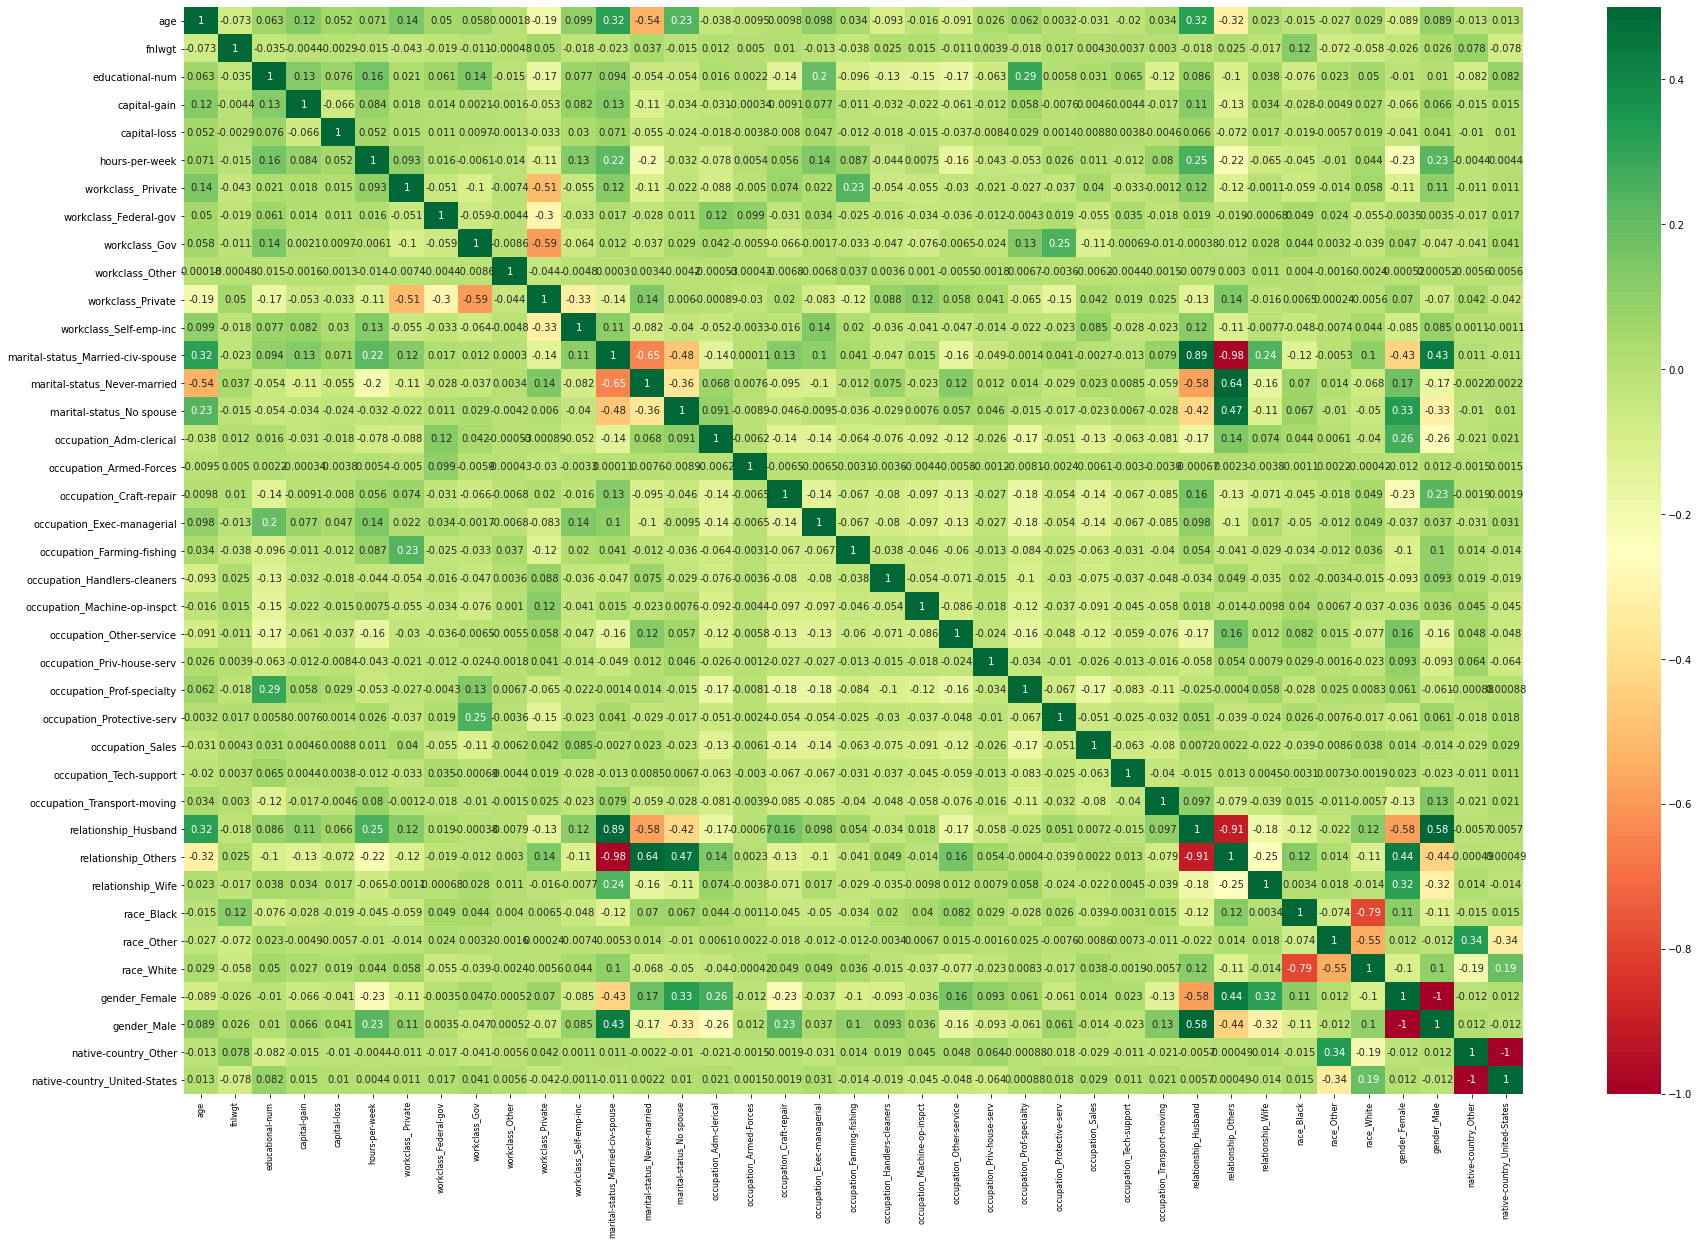

In [197]:
# Correlation Heatmap
plt.figure(figsize=[30,20])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [198]:
temp_data['income_>50K']=df['income_>50K'].copy()

In [199]:
temp_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Other,...,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States,income_>50K
0,2.066575,1.557224,2.113095,4.533226,-0.222391,1.580004,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,1
1,-1.573960,0.633074,-2.017972,-0.297591,-0.222391,-2.048981,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,0
2,-0.554610,-0.011061,1.080328,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,-0.340962,-0.025247,...,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,1
3,1.411279,-0.723724,-2.017972,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,2.932881,-0.025247,...,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,0
4,-0.991474,-0.270119,0.047562,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,2.932881,-0.025247,...,0.907004,-0.223484,3.069412,-0.227716,-2.425782,-0.703659,0.703659,-0.33888,0.33888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.974415,-1.302106,1.080328,-0.297591,-0.222391,0.773563,-0.292482,-0.173463,-0.340962,-0.025247,...,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,1
43953,-1.428338,-0.644880,-0.296694,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,1.421143,-1.421143,-0.33888,0.33888,0
43954,-0.627421,0.218716,0.047562,-0.297591,-0.222391,1.418716,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,0
43955,0.537551,-0.883090,1.080328,-0.297591,-0.222391,-0.436099,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,1.421143,-1.421143,-0.33888,0.33888,0


In [200]:
from scipy.stats import pointbiserialr,spearmanr
col_names=temp_data.columns
param=[]
correlation=[]
abs_corr=[]
for c in col_names:
    if c != "income_>50K":
        if len(temp_data[c].unique()) <= 2: 
            corr = spearmanr(temp_data['income_>50K'],temp_data [c])[0]
        else:
            corr = pointbiserialr(temp_data['income_>50K'],temp_data [c])[0]
        param.append (c)
        correlation.append(corr)
        abs_corr.append(abs(corr))
param_df=pd.DataFrame({'correlation':correlation,'parameter': param,'abs_corr':abs_corr}) 
param_df=param_df.sort_values(by=['abs_corr'],ascending=False)
param_df=param_df.set_index('parameter') 
param_df

,correlation,abs_corr
parameter,,
relationship_Others,-0.449580,0.449580
marital-status_Married-civ-spouse,0.445642,0.445642
relationship_Husband,0.404058,0.404058
educational-num,0.326343,0.326343
marital-status_Never-married,-0.317895,0.317895
capital-gain,0.289178,0.289178
age,0.230988,0.230988
hours-per-week,0.227918,0.227918
gender_Male,0.214496,0.214496


In [201]:
best_features=param_df.index[0:18].values
print('Best features:\t',best_features)

Best features:	 ['relationship_Others' 'marital-status_Married-civ-spouse'
 'relationship_Husband' 'educational-num' 'marital-status_Never-married'
 'capital-gain' 'age' 'hours-per-week' 'gender_Male' 'gender_Female'
 'occupation_Exec-managerial' 'marital-status_No spouse'
 'occupation_Other-service' 'workclass_Self-emp-inc' 'capital-loss'
 'workclass_Private' 'relationship_Wife' 'occupation_Prof-specialty']


In [202]:
temp_data_fs = temp_data.copy()

In [203]:
temp_data_fs

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Other,...,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States,income_>50K
0,2.066575,1.557224,2.113095,4.533226,-0.222391,1.580004,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,1
1,-1.573960,0.633074,-2.017972,-0.297591,-0.222391,-2.048981,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,0
2,-0.554610,-0.011061,1.080328,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,-0.340962,-0.025247,...,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,1
3,1.411279,-0.723724,-2.017972,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,2.932881,-0.025247,...,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,0
4,-0.991474,-0.270119,0.047562,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,2.932881,-0.025247,...,0.907004,-0.223484,3.069412,-0.227716,-2.425782,-0.703659,0.703659,-0.33888,0.33888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.974415,-1.302106,1.080328,-0.297591,-0.222391,0.773563,-0.292482,-0.173463,-0.340962,-0.025247,...,-1.102531,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,1
43953,-1.428338,-0.644880,-0.296694,-0.297591,-0.222391,-0.032878,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,1.421143,-1.421143,-0.33888,0.33888,0
43954,-0.627421,0.218716,0.047562,-0.297591,-0.222391,1.418716,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,-0.703659,0.703659,-0.33888,0.33888,0
43955,0.537551,-0.883090,1.080328,-0.297591,-0.222391,-0.436099,-0.292482,-0.173463,-0.340962,-0.025247,...,0.907004,-0.223484,-0.325795,-0.227716,0.412238,1.421143,-1.421143,-0.33888,0.33888,0


In [204]:
temp_data_fs=temp_data_fs.drop(['occupation_Adm-clerical','race_Black','occupation_Handlers-cleaners','race_White','occupation_Machine-op-inspct','workclass_Federal-gov','occupation_Farming-fishing','workclass_Gov','occupation_Priv-house-serv','native-country_Other','native-country_United-States','occupation_Protective-serv','workclass_ Private','occupation_Sales','occupation_Transport-moving','occupation_Tech-support','race_Other','workclass_Other','occupation_Craft-repair','fnlwgt','occupation_Armed-Forces'],axis=1)

In [205]:
temp_data_fs

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-inc,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_No spouse,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Others,relationship_Wife,gender_Female,gender_Male,income_>50K
0,2.066575,2.113095,4.533226,-0.222391,1.580004,0.573244,-0.189127,-0.919868,-0.70207,1.930825,2.642626,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659,1
1,-1.573960,-2.017972,-0.297591,-0.222391,-2.048981,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659,0
2,-0.554610,1.080328,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659,1
3,1.411279,-2.017972,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659,0
4,-0.991474,0.047562,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.974415,1.080328,-0.297591,-0.222391,0.773563,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659,1
43953,-1.428338,-0.296694,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,1.421143,-1.421143,0
43954,-0.627421,0.047562,-0.297591,-0.222391,1.418716,0.573244,-0.189127,-0.919868,-0.70207,1.930825,-0.378411,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659,0
43955,0.537551,1.080328,-0.297591,-0.222391,-0.436099,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,1.421143,-1.421143,0


In [206]:
temp_data_fs=temp_data_fs.drop(['income_>50K'],axis=1)

In [207]:
temp_data_fs

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-inc,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_No spouse,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Others,relationship_Wife,gender_Female,gender_Male
0,2.066575,2.113095,4.533226,-0.222391,1.580004,0.573244,-0.189127,-0.919868,-0.70207,1.930825,2.642626,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
1,-1.573960,-2.017972,-0.297591,-0.222391,-2.048981,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
2,-0.554610,1.080328,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
3,1.411279,-2.017972,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
4,-0.991474,0.047562,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.974415,1.080328,-0.297591,-0.222391,0.773563,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
43953,-1.428338,-0.296694,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,1.421143,-1.421143
43954,-0.627421,0.047562,-0.297591,-0.222391,1.418716,0.573244,-0.189127,-0.919868,-0.70207,1.930825,-0.378411,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
43955,0.537551,1.080328,-0.297591,-0.222391,-0.436099,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,1.421143,-1.421143


In [418]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_data_fs,df['income_>50K'],test_size=0.3,random_state=0)

In [419]:
#Logistic Regression
#lr_fs stands for featureselected data 
from sklearn.linear_model import LogisticRegression
lr_fs = LogisticRegression(random_state=0)
lr_fs.fit(x_train,y_train)
y_pred_lr_fs = lr_fs.predict(x_test)
y_pred_train_lr_fs = lr_fs.predict(x_train)

In [420]:
#testing accuracy lr_fs
print(classification_report(y_test, y_pred_lr_fs))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     10066
           1       0.69      0.57      0.63      3122

    accuracy                           0.84     13188
   macro avg       0.78      0.75      0.76     13188
weighted avg       0.83      0.84      0.83     13188



In [421]:
#training accuracy lr_fs
print(classification_report(y_train, y_pred_train_lr_fs))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     23373
           1       0.71      0.57      0.63      7396

    accuracy                           0.84     30769
   macro avg       0.79      0.75      0.77     30769
weighted avg       0.83      0.84      0.84     30769



In [422]:
from sklearn.tree import DecisionTreeClassifier
dt_fs = DecisionTreeClassifier(max_depth=10,random_state=0)
dt_fs.fit(x_train,y_train)
y_pred_dt_fs = dt_fs.predict(x_test)
y_pred_train_dt_fs = dt_fs.predict(x_train)

In [423]:
#testing accuracy dt_fs
print(classification_report(y_test, y_pred_dt_fs))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10066
           1       0.76      0.57      0.66      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.76      0.78     13188
weighted avg       0.85      0.86      0.85     13188



In [424]:
#training accuracy dt_fs
print(classification_report(y_train, y_pred_train_dt_fs))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     23373
           1       0.81      0.60      0.69      7396

    accuracy                           0.87     30769
   macro avg       0.85      0.78      0.80     30769
weighted avg       0.87      0.87      0.86     30769



In [425]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc_fs = RandomForestClassifier(random_state=0, max_depth=30)
rfc_fs.fit(x_train,y_train)
y_pred_rfc_fs = rfc_fs.predict(x_test)
y_pred_train_rfc_fs = rfc_fs.predict(x_train)

In [426]:
#testing accuracy rfc_fs
print(classification_report(y_test, y_pred_rfc_fs))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10066
           1       0.69      0.61      0.65      3122

    accuracy                           0.84     13188
   macro avg       0.79      0.77      0.78     13188
weighted avg       0.84      0.84      0.84     13188



In [427]:
#training accuracy rfc_fs
print(classification_report(y_train, y_pred_train_rfc_fs))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23373
           1       0.93      0.86      0.89      7396

    accuracy                           0.95     30769
   macro avg       0.94      0.92      0.93     30769
weighted avg       0.95      0.95      0.95     30769



In [218]:
#Support Vector Classifier svc
from sklearn.svm import SVC
svc_fs = SVC()
svc_fs.fit(x_train,y_train)
y_pred_svc_fs = svc_fs.predict(x_test)
y_pred_train_svc_fs = svc_fs.predict(x_train)

In [219]:
#testing accuracy svc_fs
print(classification_report(y_test, y_pred_svc_fs))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10066
           1       0.73      0.58      0.65      3122

    accuracy                           0.85     13188
   macro avg       0.80      0.76      0.78     13188
weighted avg       0.84      0.85      0.84     13188



In [220]:
#training accuracy svc_fs
print(classification_report(y_train, y_pred_train_svc_fs))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     23373
           1       0.75      0.59      0.66      7396

    accuracy                           0.86     30769
   macro avg       0.82      0.77      0.79     30769
weighted avg       0.85      0.86      0.85     30769



In [428]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb_fs = GaussianNB()
gnb_fs.fit(x_train,y_train)
y_pred_gnb_fs = gnb_fs.predict(x_test)
y_pred_train_gnb_fs = gnb_fs.predict(x_train)

In [429]:
#testing accuracy gnb_fs
print(classification_report(y_test, y_pred_gnb_fs))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     10066
           1       0.48      0.88      0.62      3122

    accuracy                           0.74     13188
   macro avg       0.71      0.79      0.71     13188
weighted avg       0.84      0.74      0.76     13188



In [430]:
#training accuracy gnb_fs
print(classification_report(y_train, y_pred_train_gnb_fs))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     23373
           1       0.49      0.88      0.63      7396

    accuracy                           0.75     30769
   macro avg       0.72      0.79      0.72     30769
weighted avg       0.84      0.75      0.77     30769



In [224]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbtc_fs = GradientBoostingClassifier(random_state=0)
gbtc_fs.fit(x_train,y_train)
y_pred_gbtc_fs = gbtc_fs.predict(x_test)
y_pred_train_gbtc_fs = gbtc_fs.predict(x_train)

In [225]:
#testing accuracy gbtc_fs
print(classification_report(y_test, y_pred_gbtc_fs))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10066
           1       0.78      0.59      0.67      3122

    accuracy                           0.86     13188
   macro avg       0.83      0.77      0.79     13188
weighted avg       0.86      0.86      0.86     13188



In [226]:
#training accuracy gbtc_fs
print(classification_report(y_train, y_pred_train_gbtc_fs))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     23373
           1       0.80      0.61      0.69      7396

    accuracy                           0.87     30769
   macro avg       0.84      0.78      0.80     30769
weighted avg       0.86      0.87      0.86     30769



In [227]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ad_fs = AdaBoostClassifier()
ad_fs.fit(x_train,y_train)
y_pred_ad_fs = ad_fs.predict(x_test)
y_pred_train_ad_fs = ad_fs.predict(x_train)

In [228]:
#testing accuracy ad_fs
print(classification_report(y_test, y_pred_ad_fs))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10066
           1       0.76      0.59      0.66      3122

    accuracy                           0.86     13188
   macro avg       0.82      0.77      0.79     13188
weighted avg       0.85      0.86      0.85     13188



In [229]:
#training accuracy ad_fs
print(classification_report(y_train, y_pred_train_ad_fs))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     23373
           1       0.77      0.59      0.67      7396

    accuracy                           0.86     30769
   macro avg       0.83      0.77      0.79     30769
weighted avg       0.85      0.86      0.85     30769



In [230]:
from sklearn.neighbors import KNeighborsClassifier
knn_fs = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn_fs.fit(x_train,y_train)
y_pred_knn_fs = knn_fs.predict(x_test)
y_pred_train_knn_fs = knn_fs.predict(x_train)

In [231]:
#testing accuracy knn_fs
print(classification_report(y_test, y_pred_knn_fs))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10066
           1       0.65      0.60      0.62      3122

    accuracy                           0.83     13188
   macro avg       0.76      0.75      0.76     13188
weighted avg       0.82      0.83      0.83     13188



In [232]:
#training accuracy knn_fs
print(classification_report(y_train, y_pred_train_knn_fs))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23373
           1       0.77      0.68      0.73      7396

    accuracy                           0.88     30769
   macro avg       0.84      0.81      0.82     30769
weighted avg       0.87      0.88      0.87     30769



In [233]:
knn_fs = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 1)
knn_fs.fit(x_train,y_train)
y_pred_knn_fs = knn_fs.predict(x_test)
y_pred_train_knn_fs = knn_fs.predict(x_train)

In [234]:
#testing accuracy knn_fs
print(classification_report(y_test, y_pred_knn_fs))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10066
           1       0.65      0.60      0.62      3122

    accuracy                           0.83     13188
   macro avg       0.76      0.75      0.76     13188
weighted avg       0.82      0.83      0.83     13188



In [235]:
#training accuracy knn_fs
print(classification_report(y_train, y_pred_train_knn_fs))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23373
           1       0.78      0.69      0.73      7396

    accuracy                           0.88     30769
   macro avg       0.84      0.81      0.83     30769
weighted avg       0.87      0.88      0.88     30769



In [236]:
one_hot_encoded_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Other,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,67,605.330488,16,3.59381,0.0,60,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,17,494.572543,4,0.00000,0.0,15,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,31,417.373933,13,0.00000,0.0,40,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,58,331.962347,4,0.00000,0.0,40,0,0,1,0,...,1,0,0,0,0,1,0,1,0,1
4,25,386.326287,10,0.00000,0.0,40,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,262.644246,13,0.00000,0.0,50,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
43953,19,341.411775,9,0.00000,0.0,40,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
43954,30,444.912351,10,0.00000,0.0,58,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
43955,46,312.862590,13,0.00000,0.0,35,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1


Parameter tunning

In [237]:
def ConfusionMatrix(classifier, X=one_hot_encoded_data, y=df['income_>50K'], confusionMatrix = True, plotConfusionMatrix = True):

        
        #split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, 
                                                            stratify=y)

        # Fit the classifier to the data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

In [238]:
def GridSearch(param, estimator, X=one_hot_encoded_data, y=df['income_>50K']):
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, grid_rf_predictions))

In [239]:
original_data=df.copy()

In [240]:
features = one_hot_encoded_data.columns.tolist()

In [241]:
target=original_data['income_>50K']

In [242]:
new_one_hot_encoded_data=one_hot_encoded_data.copy()
new_one_hot_encoded_data['income_>50K']=original_data['income_>50K']

In [243]:
new_one_hot_encoded_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Other,...,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States,income_>50K
0,67,605.330488,16,3.59381,0.0,60,0,0,0,0,...,1,0,0,0,1,0,1,0,1,1
1,17,494.572543,4,0.00000,0.0,15,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,31,417.373933,13,0.00000,0.0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
3,58,331.962347,4,0.00000,0.0,40,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,25,386.326287,10,0.00000,0.0,40,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,262.644246,13,0.00000,0.0,50,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
43953,19,341.411775,9,0.00000,0.0,40,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
43954,30,444.912351,10,0.00000,0.0,58,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
43955,46,312.862590,13,0.00000,0.0,35,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [431]:
#BAse model hyper parameter tuning
lr=LogisticRegression()
lr_params = {'C':[0.008,0.05, 0.5, 5, 20, 150, 1500], 'penalty':['l2','l1']}
lr_gs = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1)
model=lr_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred= model.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.83520261        nan 0.83779613        nan 0.83850127        nan
 0.83838741        nan 0.83859236        nan 0.8376822         nan
 0.8408216         nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.92      0.90     33439
           1       0.70      0.58      0.63     10518

    accuracy                           0.84     43957
   macro avg       0.79      0.75      0.76     43957
weighted avg       0.83      0.84      0.83     43957



/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [245]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth':[5,10,15]}
dt_gs = GridSearchCV(dt, dt_params, cv=5, verbose=1, n_jobs=-1)
model_dt=dt_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_dt= model_dt.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred_dt))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     33439
           1       0.80      0.62      0.70     10518

    accuracy                           0.87     43957
   macro avg       0.84      0.78      0.81     43957
weighted avg       0.87      0.87      0.87     43957



In [432]:
rfc = RandomForestClassifier(random_state=0, max_depth=30)
rfc_params = {'max_depth':[5,10,15]}
rfc_gs = GridSearchCV(rfc, rfc_params, cv=5, verbose=1, n_jobs=-1)
model_rfc=rfc_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_rfc= model_rfc.predict(temp_data_fs)
print(classification_report(df['income_>50K'], y_pred_rfc))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


ValueError: X has 18 features, but DecisionTreeClassifier is expecting 39 features as input.

In [247]:
svc = SVC()
svc_params = {'kernel':['rbf']}
svc_gs = GridSearchCV(svc, svc_params, cv=5, verbose=1, n_jobs=-1)
model_svc=svc_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_svc= model_svc.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred_svc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     33439
           1       0.00      0.00      0.00     10518

    accuracy                           0.76     43957
   macro avg       0.38      0.50      0.43     43957
weighted avg       0.58      0.76      0.66     43957



/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [248]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [249]:
gnb = GaussianNB()
gnb_params = {'priors':[None]}
gnb_gs = GridSearchCV(gnb, gnb_params, cv=5, verbose=1, n_jobs=-1)
model_gnb=gnb_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_gnb= model_gnb.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred_gnb))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     33439
           1       0.50      0.84      0.63     10518

    accuracy                           0.76     43957
   macro avg       0.72      0.79      0.73     43957
weighted avg       0.83      0.76      0.78     43957



In [250]:
gbtc = GradientBoostingClassifier(random_state=0)
gbtc_params = {'loss':['exponential']}
gbtc_gs = GridSearchCV(gbtc, gbtc_params, cv=5, verbose=1, n_jobs=-1)
model_gbtc=gbtc_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_gbtc= model_gbtc.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred_gbtc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     33439
           1       0.79      0.62      0.69     10518

    accuracy                           0.87     43957
   macro avg       0.84      0.78      0.80     43957
weighted avg       0.86      0.87      0.86     43957



In [251]:
ad = AdaBoostClassifier()
ad_params = {'learning_rate':[0.5]}
ad_gs = GridSearchCV(ad, ad_params, cv=5, verbose=1, n_jobs=-1)
model_ad=ad_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_ad = model_ad.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred_ad))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33439
           1       0.77      0.58      0.66     10518

    accuracy                           0.86     43957
   macro avg       0.82      0.76      0.79     43957
weighted avg       0.85      0.86      0.85     43957



In [252]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 1)
knn_params = {'n_neighbors' : [5],'metric' : ['minkowski'], 'p' :[1,2]}
knn_gs = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1)
model_knn=knn_gs.fit(one_hot_encoded_data,df['income_>50K'])
y_pred_knn = model_knn.predict(one_hot_encoded_data)
print(classification_report(df['income_>50K'], y_pred_knn))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     33439
           1       0.77      0.63      0.69     10518

    accuracy                           0.87     43957
   macro avg       0.83      0.79      0.80     43957
weighted avg       0.86      0.87      0.86     43957



In [259]:
y=df['income_>50K']

/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


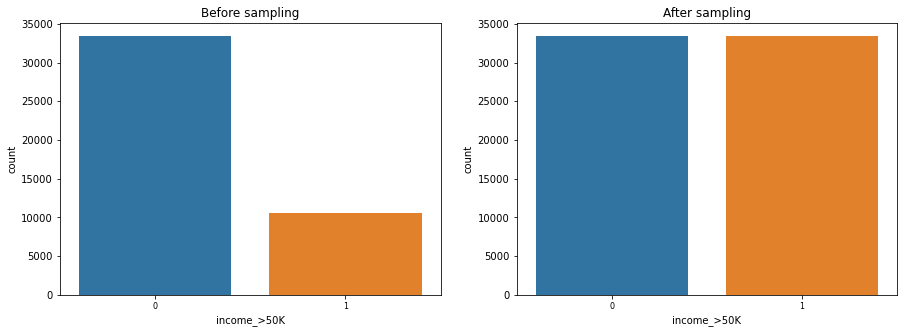

Before sampling : 
0    33439
1    10518
Name: income_>50K, dtype: int64

After sampling : 
0    33439
1    33439
Name: income_>50K, dtype: int64


In [433]:
#RESAMPLING dataset using the feature selected data
from imblearn.over_sampling import RandomOverSampler
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(temp_data_fs,df['income_>50K'])
# Plot Before sampling
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['income_>50K'])
plt.title("Before sampling")

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(y_sampled.squeeze())
plt.title("After sampling")
plt.show()

print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))

In [434]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=0)

In [435]:
#Logistic Regression
#lr_fs_rs stands for scaled data resampled
from sklearn.linear_model import LogisticRegression
lr_rs = LogisticRegression(random_state=0)
lr_rs.fit(x_train,y_train)
y_pred_lr_rs = lr_rs.predict(x_test)
y_pred_train_lr_rs = lr_rs.predict(x_train)

In [436]:
#testing accuracy lr_rs
print(classification_report(y_test, y_pred_lr_rs))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      9967
           1       0.79      0.85      0.82     10097

    accuracy                           0.81     20064
   macro avg       0.82      0.81      0.81     20064
weighted avg       0.82      0.81      0.81     20064



In [437]:
#training accuracy lr_rs
print(classification_report(y_train, y_pred_train_lr_rs))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80     23472
           1       0.79      0.84      0.81     23342

    accuracy                           0.81     46814
   macro avg       0.81      0.81      0.81     46814
weighted avg       0.81      0.81      0.81     46814



In [438]:
from sklearn.tree import DecisionTreeClassifier
dt_rs = DecisionTreeClassifier(max_depth=10,random_state=0)
dt_rs.fit(x_train,y_train)
y_pred_dt_rs = dt_rs.predict(x_test)
y_pred_train_dt_rs = dt_rs.predict(x_train)

In [439]:
#testing accuracy dt_rs
print(classification_report(y_test, y_pred_dt_rs))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      9967
           1       0.81      0.88      0.85     10097

    accuracy                           0.84     20064
   macro avg       0.84      0.84      0.84     20064
weighted avg       0.84      0.84      0.84     20064



In [440]:
#training accuracy dt_rs
print(classification_report(y_train, y_pred_train_dt_rs))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84     23472
           1       0.82      0.88      0.85     23342

    accuracy                           0.84     46814
   macro avg       0.84      0.84      0.84     46814
weighted avg       0.85      0.84      0.84     46814



In [441]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc_rs = RandomForestClassifier(random_state=0, max_depth=30)
rfc_rs.fit(x_train,y_train)
y_pred_rfc_rs = rfc_rs.predict(x_test)
y_pred_train_rfc_rs = rfc_rs.predict(x_train)

In [442]:
#testing accuracy rfc_rs
print(classification_report(y_test, y_pred_rfc_rs))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      9967
           1       0.86      0.94      0.89     10097

    accuracy                           0.89     20064
   macro avg       0.89      0.89      0.89     20064
weighted avg       0.89      0.89      0.89     20064



In [443]:
#training accuracy rfc_rs
print(classification_report(y_train, y_pred_train_rfc_rs))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     23472
           1       0.92      0.97      0.94     23342

    accuracy                           0.94     46814
   macro avg       0.94      0.94      0.94     46814
weighted avg       0.94      0.94      0.94     46814



In [273]:
#Support Vector Classifier svc
from sklearn.svm import SVC
svc_rs = SVC()
svc_rs.fit(x_train,y_train)
y_pred_svc_rs = svc_rs.predict(x_test)
y_pred_train_svc_rs = svc_rs.predict(x_train)

In [274]:
#testing accuracy svc_rs
print(classification_report(y_test, y_pred_svc_rs))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      9967
           1       0.80      0.88      0.84     10097

    accuracy                           0.83     20064
   macro avg       0.83      0.83      0.83     20064
weighted avg       0.83      0.83      0.83     20064



In [275]:
#training accuracy svc_rs
print(classification_report(y_train, y_pred_train_svc_rs))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83     23472
           1       0.81      0.88      0.84     23342

    accuracy                           0.84     46814
   macro avg       0.84      0.84      0.83     46814
weighted avg       0.84      0.84      0.83     46814



In [444]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb_rs = GaussianNB()
gnb_rs.fit(x_train,y_train)
y_pred_gnb_rs = gnb_rs.predict(x_test)
y_pred_train_gnb_rs = gnb_rs.predict(x_train)

In [445]:
#testing accuracy gnb_rs
print(classification_report(y_test, y_pred_gnb_rs))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76      9967
           1       0.74      0.89      0.81     10097

    accuracy                           0.79     20064
   macro avg       0.80      0.79      0.79     20064
weighted avg       0.80      0.79      0.79     20064



In [278]:
#training accuracy gnb_rs
print(classification_report(y_train, y_pred_train_gnb_rs))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78     23472
           1       0.76      0.85      0.80     23342

    accuracy                           0.79     46814
   macro avg       0.79      0.79      0.79     46814
weighted avg       0.79      0.79      0.79     46814



In [279]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbtc_rs = GradientBoostingClassifier(random_state=0)
gbtc_rs.fit(x_train,y_train)
y_pred_gbtc_rs = gbtc_rs.predict(x_test)
y_pred_train_gbtc_rs = gbtc_rs.predict(x_train)

In [280]:
#testing accuracy gbtc_rs
print(classification_report(y_test, y_pred_gbtc_rs))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      9967
           1       0.83      0.88      0.85     10097

    accuracy                           0.85     20064
   macro avg       0.85      0.85      0.85     20064
weighted avg       0.85      0.85      0.85     20064



In [281]:
#training accuracy gbtc_rs
print(classification_report(y_train, y_pred_train_gbtc_rs))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     23472
           1       0.82      0.87      0.84     23342

    accuracy                           0.84     46814
   macro avg       0.84      0.84      0.84     46814
weighted avg       0.84      0.84      0.84     46814



In [288]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ad_rs = AdaBoostClassifier()
ad_rs.fit(x_train,y_train)
y_pred_ad_rs = ad_rs.predict(x_test)
y_pred_train_ad_rs = ad_rs.predict(x_train)

In [289]:
#testing accuracy ad_rs
print(classification_report(y_test, y_pred_ad_rs))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      9967
           1       0.82      0.85      0.84     10097

    accuracy                           0.83     20064
   macro avg       0.83      0.83      0.83     20064
weighted avg       0.83      0.83      0.83     20064



In [290]:
#training accuracy ad_rs
print(classification_report(y_train, y_pred_train_ad_rs))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83     23472
           1       0.82      0.84      0.83     23342

    accuracy                           0.83     46814
   macro avg       0.83      0.83      0.83     46814
weighted avg       0.83      0.83      0.83     46814



In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn_rs = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn_rs.fit(x_train,y_train)
y_pred_knn_rs = knn_rs.predict(x_test)
y_pred_train_knn_rs = knn_rs.predict(x_train)

In [292]:
#testing accuracy knn_rs
print(classification_report(y_test, y_pred_knn_rs))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      9967
           1       0.80      0.90      0.84     10097

    accuracy                           0.83     20064
   macro avg       0.84      0.83      0.83     20064
weighted avg       0.84      0.83      0.83     20064



In [293]:
#training accuracy knn_rs
print(classification_report(y_train, y_pred_train_knn_rs))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     23472
           1       0.84      0.94      0.89     23342

    accuracy                           0.88     46814
   macro avg       0.89      0.88      0.88     46814
weighted avg       0.89      0.88      0.88     46814



In [294]:
knn_rs = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 1)
knn_rs.fit(x_train,y_train)
y_pred_knn_rs = knn_rs.predict(x_test)
y_pred_train_knn_rs = knn_rs.predict(x_train)

In [295]:
#testing accuracy knn_rs
print(classification_report(y_test, y_pred_knn_rs))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      9967
           1       0.80      0.89      0.84     10097

    accuracy                           0.83     20064
   macro avg       0.84      0.83      0.83     20064
weighted avg       0.84      0.83      0.83     20064



In [296]:
#training accuracy knn_rs
print(classification_report(y_train, y_pred_train_knn_rs))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     23472
           1       0.84      0.94      0.89     23342

    accuracy                           0.88     46814
   macro avg       0.89      0.88      0.88     46814
weighted avg       0.89      0.88      0.88     46814



In [ ]:
#Hyperparameter tuning with the resampled dataset

In [384]:
lr=LogisticRegression()
lr_params = {'C':[0.008,0.05, 0.5, 5, 20, 150, 1500], 'penalty':['l2','l1']}
lr_gs = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1)
model_lr=lr_gs.fit(X_sampled,y_sampled)
y_pred= model_lr.predict(X_sampled)
print(classification_report(y_sampled, y_pred))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/pritamanurag/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.81102906        nan 0.81116362        nan 0.81113371        nan
 0.81113371        nan 0.81113371        nan 0.81113371        nan
 0.81113371        nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.78      0.81     33439
           1       0.79      0.84      0.82     33439

    accuracy                           0.81     66878
   macro avg       0.81      0.81      0.81     66878
weighted avg       0.81      0.81      0.81     66878



In [300]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth':[5,10,15]}
dt_gs = GridSearchCV(dt, dt_params, cv=5, verbose=1, n_jobs=-1)
model_dt=dt_gs.fit(X_sampled,y_sampled)
y_pred_dt= model_dt.predict(X_sampled)
print(classification_report(y_sampled, y_pred_dt))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     33439
           1       0.85      0.94      0.89     33439

    accuracy                           0.89     66878
   macro avg       0.89      0.89      0.89     66878
weighted avg       0.89      0.89      0.89     66878



In [446]:
rfc = RandomForestClassifier(random_state=0, max_depth=30)
rfc_params = {'max_depth':[20,30,40]}
rfc_gs = GridSearchCV(rfc, rfc_params, cv=5, verbose=1, n_jobs=-1)
model_rfc=rfc_gs.fit(X_sampled,y_sampled)
y_pred_rfc= model_rfc.predict(X_sampled)
print(classification_report(y_sampled, y_pred_rfc))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     33439
           1       0.92      0.97      0.94     33439

    accuracy                           0.94     66878
   macro avg       0.94      0.94      0.94     66878
weighted avg       0.94      0.94      0.94     66878



In [302]:
svc = SVC()
svc_params = {'kernel':['rbf']}
svc_gs = GridSearchCV(svc, svc_params, cv=5, verbose=1, n_jobs=-1)
model_svc=svc_gs.fit(X_sampled,y_sampled)
y_pred_svc= model_svc.predict(X_sampled)
print(classification_report(y_sampled, y_pred_svc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     33439
           1       0.81      0.89      0.85     33439

    accuracy                           0.84     66878
   macro avg       0.84      0.84      0.84     66878
weighted avg       0.84      0.84      0.84     66878



In [303]:
gnb = GaussianNB()
gnb_params = {'priors':[None]}
gnb_gs = GridSearchCV(gnb, gnb_params, cv=5, verbose=1, n_jobs=-1)
model_gnb=gnb_gs.fit(X_sampled,y_sampled)
y_pred_gnb= model_gnb.predict(X_sampled)
print(classification_report(y_sampled, y_pred_gnb))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     33439
           1       0.76      0.85      0.80     33439

    accuracy                           0.79     66878
   macro avg       0.79      0.79      0.79     66878
weighted avg       0.79      0.79      0.79     66878



In [304]:
gbtc = GradientBoostingClassifier(random_state=0)
gbtc_params = {'loss':['exponential']}
gbtc_gs = GridSearchCV(gbtc, gbtc_params, cv=5, verbose=1, n_jobs=-1)
model_gbtc=gbtc_gs.fit(X_sampled,y_sampled)
y_pred_gbtc= model_gbtc.predict(X_sampled)
print(classification_report(y_sampled, y_pred_gbtc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     33439
           1       0.82      0.87      0.84     33439

    accuracy                           0.84     66878
   macro avg       0.84      0.84      0.84     66878
weighted avg       0.84      0.84      0.84     66878



In [305]:
ad = AdaBoostClassifier()
ad_params = {'learning_rate':[0.5]}
ad_gs = GridSearchCV(ad, ad_params, cv=5, verbose=1, n_jobs=-1)
model_ad=ad_gs.fit(X_sampled,y_sampled)
y_pred_ad = model_ad.predict(X_sampled)
print(classification_report(y_sampled, y_pred_ad))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     33439
           1       0.82      0.85      0.83     33439

    accuracy                           0.83     66878
   macro avg       0.83      0.83      0.83     66878
weighted avg       0.83      0.83      0.83     66878



In [306]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors' : [5],'metric' : ['minkowski'], 'p' :[1,2]}
knn_gs = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1)
model_knn=knn_gs.fit(X_sampled,y_sampled)
y_pred_knn = model_knn.predict(X_sampled)
print(classification_report(y_sampled, y_pred_knn))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     33439
           1       0.85      0.96      0.90     33439

    accuracy                           0.90     66878
   macro avg       0.90      0.90      0.90     66878
weighted avg       0.90      0.90      0.90     66878



In [388]:
test_dataset=pd.read_csv('/Users/pritamanurag/Downloads/test.csv')
test_dataset
                    

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


In [389]:
testing_dataset=test_dataset.copy()

In [390]:
test_dataset.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [391]:
testing_dataset['workclass'].replace(['Never-worked', 'Without-pay'],'Other', inplace = True)
testing_dataset['workclass'].value_counts()

Private             629
Self-emp-not-inc     85
Local-gov            68
Self-emp-inc         45
State-gov            43
Federal-gov          29
Name: workclass, dtype: int64

In [392]:
test_dataset['workclass'].value_counts()

Private             629
Self-emp-not-inc     85
Local-gov            68
Self-emp-inc         45
State-gov            43
Federal-gov          29
Name: workclass, dtype: int64

In [393]:
testing_dataset['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
testing_dataset['race'].value_counts()

White    775
Black     90
Other     34
Name: race, dtype: int64

In [394]:
testing_dataset['native-country'].value_counts()

United-States         819
Mexico                 13
Poland                  8
Puerto-Rico             5
Canada                  4
El-Salvador             4
Italy                   3
Philippines             3
Columbia                3
Jamaica                 3
Taiwan                  3
Portugal                3
Nicaragua               3
Germany                 3
China                   2
France                  2
India                   2
South                   2
Cuba                    2
Ecuador                 2
England                 2
Dominican-Republic      1
Guatemala               1
Trinadad&Tobago         1
Greece                  1
Laos                    1
Cambodia                1
Thailand                1
Haiti                   1
Name: native-country, dtype: int64

In [395]:
for i in range(0,899):
    if(testing_dataset.iloc[i][13]!='United-States' ):
        testing_dataset['native-country'].replace(testing_dataset.iloc[i][13],'Other', inplace = True)
        

In [396]:
testing_dataset['native-country'].value_counts()

United-States    819
Other             80
Name: native-country, dtype: int64

In [397]:
testing_dataset.workclass = testing_dataset.workclass.replace('State-gov','Gov')
testing_dataset.workclass = testing_dataset.workclass.replace('Local-gov','Gov')
testing_dataset.workclass = testing_dataset.workclass.replace('Self-emp-not-inc',' Private')

In [398]:
testing_dataset.education = testing_dataset.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')

In [399]:
testing_dataset['marital-status'] = testing_dataset['marital-status'].replace(['Divorced', 'Married-spouse-absent','Separated','Widowed','Married-AF-spouse'],'No spouse')

In [400]:
testing_dataset.relationship = testing_dataset.relationship.replace(['Not-in-family','Own-child','Unmarried','Other-relative'],'Others')

In [401]:
one_hot_encoded_test_data = pd.get_dummies(testing_dataset, columns = ['workclass','marital-status','occupation','relationship','race','gender','native-country'])
one_hot_encoded_test_data

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,39,327120,HS-grad,9,0,0,40,1,0,0,...,1,0,0,0,0,1,0,1,1,0
1,32,123253,Assoc-acdm,12,0,0,42,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,47,232628,HS-grad,9,0,0,40,0,0,0,...,1,0,0,1,0,0,0,1,0,1
3,19,374262,School,8,0,0,20,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,46,311231,HS-grad,9,0,0,40,1,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,302406,Masters,14,0,0,55,0,0,0,...,1,0,0,0,0,1,0,1,0,1
895,17,218124,School,7,0,0,20,0,0,0,...,0,1,0,0,0,1,1,0,0,1
896,24,127139,Some-college,10,0,0,40,0,0,0,...,0,1,0,0,0,1,1,0,0,1
897,35,132879,Some-college,10,0,0,40,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [402]:
one_hot_encoded_test_data.drop('education',axis='columns',inplace=True)

In [403]:
one_hot_encoded_test_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Private,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,39,327120,9,0,0,40,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,32,123253,12,0,0,42,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
2,47,232628,9,0,0,40,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,19,374262,8,0,0,20,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
4,46,311231,9,0,0,40,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,302406,14,0,0,55,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
895,17,218124,7,0,0,20,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
896,24,127139,10,0,0,40,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
897,35,132879,10,0,0,40,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1


In [404]:
#Scaling the test dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_test_dataset = sc.fit_transform(one_hot_encoded_test_data)
x_testing = pd.DataFrame(scaled_test_dataset,columns=one_hot_encoded_test_data.columns)

In [405]:
x_testing

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_Federal-gov,workclass_Gov,workclass_Private,...,relationship_Husband,relationship_Others,relationship_Wife,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,0.032421,1.267744,-0.478877,-0.16743,-0.252815,-0.090495,3.094587,-0.182574,-0.375317,-1.526312,...,1.237899,-1.127032,-0.218599,-0.333539,-0.198258,0.4,-0.695340,0.695340,3.199609,-3.199609
1,-0.503083,-0.675936,0.732690,-0.16743,-0.252815,0.070924,-0.323145,-0.182574,-0.375317,0.655174,...,1.237899,-1.127032,-0.218599,-0.333539,-0.198258,0.4,-0.695340,0.695340,-0.312538,0.312538
2,0.644426,0.366851,-0.478877,-0.16743,-0.252815,-0.090495,-0.323145,-0.182574,-0.375317,0.655174,...,1.237899,-1.127032,-0.218599,2.998148,-0.198258,-2.5,-0.695340,0.695340,-0.312538,0.312538
3,-1.497592,1.717198,-0.882732,-0.16743,-0.252815,-1.704686,-0.323145,-0.182574,-0.375317,0.655174,...,-0.807820,0.887286,-0.218599,-0.333539,-0.198258,0.4,-0.695340,0.695340,-0.312538,0.312538
4,0.567926,1.116257,-0.478877,-0.16743,-0.252815,-0.090495,3.094587,-0.182574,-0.375317,-1.526312,...,1.237899,-1.127032,-0.218599,-0.333539,-0.198258,0.4,-0.695340,0.695340,-0.312538,0.312538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.885586,1.032119,1.540401,-0.16743,-0.252815,1.120148,-0.323145,-0.182574,-0.375317,0.655174,...,1.237899,-1.127032,-0.218599,-0.333539,-0.198258,0.4,-0.695340,0.695340,-0.312538,0.312538
895,-1.650593,0.228569,-1.286588,-0.16743,-0.252815,-1.704686,-0.323145,-0.182574,-0.375317,0.655174,...,-0.807820,0.887286,-0.218599,-0.333539,-0.198258,0.4,1.438144,-1.438144,-0.312538,0.312538
896,-1.115088,-0.638887,-0.075021,-0.16743,-0.252815,-0.090495,-0.323145,-0.182574,-0.375317,0.655174,...,-0.807820,0.887286,-0.218599,-0.333539,-0.198258,0.4,1.438144,-1.438144,-0.312538,0.312538
897,-0.273581,-0.584162,-0.075021,-0.16743,-0.252815,-0.090495,-0.323145,-0.182574,-0.375317,0.655174,...,1.237899,-1.127032,-0.218599,-0.333539,-0.198258,0.4,-0.695340,0.695340,-0.312538,0.312538


In [406]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                43957 non-null  float64
 1   fnlwgt                             43957 non-null  float64
 2   educational-num                    43957 non-null  float64
 3   capital-gain                       43957 non-null  float64
 4   capital-loss                       43957 non-null  float64
 5   hours-per-week                     43957 non-null  float64
 6   workclass_ Private                 43957 non-null  float64
 7   workclass_Federal-gov              43957 non-null  float64
 8   workclass_Gov                      43957 non-null  float64
 9   workclass_Other                    43957 non-null  float64
 10  workclass_Private                  43957 non-null  float64
 11  workclass_Self-emp-inc             43957 non-null  flo

In [407]:
x_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                899 non-null    float64
 1   fnlwgt                             899 non-null    float64
 2   educational-num                    899 non-null    float64
 3   capital-gain                       899 non-null    float64
 4   capital-loss                       899 non-null    float64
 5   hours-per-week                     899 non-null    float64
 6   workclass_ Private                 899 non-null    float64
 7   workclass_Federal-gov              899 non-null    float64
 8   workclass_Gov                      899 non-null    float64
 9   workclass_Private                  899 non-null    float64
 10  workclass_Self-emp-inc             899 non-null    float64
 11  marital-status_Married-civ-spouse  899 non-null    float64

In [408]:
X_sampled

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-inc,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_No spouse,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Others,relationship_Wife,gender_Female,gender_Male
0,2.066575,2.113095,4.533226,-0.222391,1.580004,0.573244,-0.189127,-0.919868,-0.70207,1.930825,2.642626,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
1,-1.573960,-2.017972,-0.297591,-0.222391,-2.048981,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
2,-0.554610,1.080328,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
3,1.411279,-2.017972,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
4,-0.991474,0.047562,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66873,-0.263367,0.047562,-0.297591,-0.222391,0.773563,-1.744459,5.287455,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
66874,0.828793,-0.296694,-0.297591,-0.222391,0.612275,-1.744459,-0.189127,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,2.116174,1.215150,-1.102531,-0.223484,-0.703659,0.703659
66875,-0.408989,1.424584,3.615796,-0.222391,-0.032878,0.573244,-0.189127,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,2.116174,1.215150,-1.102531,-0.223484,-0.703659,0.703659
66876,1.120036,2.113095,-0.297591,-0.222391,1.580004,-1.744459,5.287455,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,2.116174,1.215150,-1.102531,-0.223484,-0.703659,0.703659


In [409]:
x_testing_fs=x_testing.copy()

In [410]:
x_testing_fs=x_testing_fs.drop(['occupation_Adm-clerical','race_Black','occupation_Handlers-cleaners','race_White','occupation_Machine-op-inspct','workclass_Federal-gov','occupation_Farming-fishing','workclass_Gov','occupation_Priv-house-serv','native-country_Other','native-country_United-States','occupation_Protective-serv','workclass_ Private','occupation_Sales','occupation_Transport-moving','occupation_Tech-support','race_Other','occupation_Craft-repair','fnlwgt','occupation_Armed-Forces'],axis=1)

In [411]:
x_testing_fs

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-inc,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_No spouse,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Others,relationship_Wife,gender_Female,gender_Male
0,0.032421,-0.478877,-0.16743,-0.252815,-0.090495,-1.526312,-0.22955,1.111899,-0.704159,-0.533185,-0.363651,-0.32524,-0.388701,1.237899,-1.127032,-0.218599,-0.695340,0.695340
1,-0.503083,0.732690,-0.16743,-0.252815,0.070924,0.655174,-0.22955,1.111899,-0.704159,-0.533185,-0.363651,-0.32524,-0.388701,1.237899,-1.127032,-0.218599,-0.695340,0.695340
2,0.644426,-0.478877,-0.16743,-0.252815,-0.090495,0.655174,-0.22955,1.111899,-0.704159,-0.533185,-0.363651,-0.32524,-0.388701,1.237899,-1.127032,-0.218599,-0.695340,0.695340
3,-1.497592,-0.882732,-0.16743,-0.252815,-1.704686,0.655174,-0.22955,-0.899363,1.420133,-0.533185,-0.363651,-0.32524,-0.388701,-0.807820,0.887286,-0.218599,-0.695340,0.695340
4,0.567926,-0.478877,-0.16743,-0.252815,-0.090495,-1.526312,-0.22955,1.111899,-0.704159,-0.533185,-0.363651,-0.32524,-0.388701,1.237899,-1.127032,-0.218599,-0.695340,0.695340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.885586,1.540401,-0.16743,-0.252815,1.120148,0.655174,-0.22955,1.111899,-0.704159,-0.533185,-0.363651,-0.32524,2.572673,1.237899,-1.127032,-0.218599,-0.695340,0.695340
895,-1.650593,-1.286588,-0.16743,-0.252815,-1.704686,0.655174,-0.22955,-0.899363,1.420133,-0.533185,-0.363651,-0.32524,-0.388701,-0.807820,0.887286,-0.218599,1.438144,-1.438144
896,-1.115088,-0.075021,-0.16743,-0.252815,-0.090495,0.655174,-0.22955,-0.899363,1.420133,-0.533185,-0.363651,-0.32524,-0.388701,-0.807820,0.887286,-0.218599,1.438144,-1.438144
897,-0.273581,-0.075021,-0.16743,-0.252815,-0.090495,0.655174,-0.22955,1.111899,-0.704159,-0.533185,-0.363651,-0.32524,-0.388701,1.237899,-1.127032,-0.218599,-0.695340,0.695340


In [370]:
temp_data_fs

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-inc,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_No spouse,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Others,relationship_Wife,gender_Female,gender_Male
0,2.066575,2.113095,4.533226,-0.222391,1.580004,0.573244,-0.189127,-0.919868,-0.70207,1.930825,2.642626,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
1,-1.573960,-2.017972,-0.297591,-0.222391,-2.048981,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
2,-0.554610,1.080328,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
3,1.411279,-2.017972,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,1.087113,-0.70207,-0.517913,-0.378411,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
4,-0.991474,0.047562,-0.297591,-0.222391,-0.032878,-1.744459,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.974415,1.080328,-0.297591,-0.222391,0.773563,0.573244,-0.189127,1.087113,-0.70207,-0.517913,2.642626,-0.335532,-0.472551,1.215150,-1.102531,-0.223484,-0.703659,0.703659
43953,-1.428338,-0.296694,-0.297591,-0.222391,-0.032878,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,2.980339,-0.472551,-0.822943,0.907004,-0.223484,1.421143,-1.421143
43954,-0.627421,0.047562,-0.297591,-0.222391,1.418716,0.573244,-0.189127,-0.919868,-0.70207,1.930825,-0.378411,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,-0.703659,0.703659
43955,0.537551,1.080328,-0.297591,-0.222391,-0.436099,0.573244,-0.189127,-0.919868,1.42436,-0.517913,-0.378411,-0.335532,-0.472551,-0.822943,0.907004,-0.223484,1.421143,-1.421143


In [450]:
test_class_label = model_rfc.predict(x_testing_fs)

In [452]:
test_class_label

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [453]:
test_class_label=pd.DataFrame(test_class_label)

In [454]:
test_class_label.to_csv("predicted_class_labels_of_test_dataset_income_prediction.csv")